In [3]:
!pip install --upgrade xgboost
!pip install scikit-learn
!pip install keras-tuner

In [5]:
!pip install arch

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 985.3/985.3 kB 9.7 MB/s eta 0:00:00


In [6]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet, RANSACRegressor
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor, BaggingRegressor, AdaBoostRegressor, GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import GridSearchCV, KFold
from sklearn.metrics import r2_score
from xgboost import XGBRegressor
import joblib
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor, BaggingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from xgboost import XGBRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import RANSACRegressor
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.colors as mcolors
from statsmodels.tsa.stattools import grangercausalitytests
from scipy.stats import shapiro, skew, kurtosis
import scipy.stats as stats
from statsmodels.tsa.stattools import adfuller, kpss, acf, pacf
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.stats.diagnostic import het_breuschpagan, acorr_ljungbox
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.stats.stattools import jarque_bera, durbin_watson
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.api import add_constant
from statsmodels.tsa.api import VAR, VECM
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.vector_ar.vecm import coint_johansen
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.decomposition import PCA, KernelPCA
from sklearn.feature_selection import mutual_info_regression
from sklearn.model_selection import train_test_split, cross_val_score, TimeSeriesSplit
from sklearn.linear_model import LassoCV, Ridge, ElasticNet, LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor, plot_tree
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error, mean_absolute_error
from sklearn.model_selection import GridSearchCV, PredefinedSplit
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, SimpleRNN, LSTM
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, GRU, Dense, Dropout, Conv1D, MaxPooling1D, Flatten, Bidirectional
from prophet import Prophet
from prophet.diagnostics import cross_validation, performance_metrics
from scipy.optimize import minimize
from sklearn.neighbors import KernelDensity
import keras_tuner as kt  # Import for keras-tuner
from arch import arch_model
import warnings
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [7]:
df=pd.read_csv("/content/Combined Dataset Nifty Project ADS for Python.csv")
df.head()

Quarter  Year        Date  Real GDP (India)  Nominal GDP (India)  \
0  2005-Q2  2005  01-04-2005        12815900.0            8223800.0   
1  2005-Q3  2005  01-07-2005        12860700.0            8404100.0   
2  2005-Q4  2005  01-10-2005        14497100.0            9591900.0   
3  2006-Q1  2006  01-01-2006        15256400.0           10069300.0   
4  2006-Q2  2006  01-04-2006        13765000.0            9356400.0   

   Export:Import Ratio   Price (NIFTY 50)  Change % (NIFTY 50)  \
0                64.97            2044.32                0.14%   
1                65.95            2370.57                0.26%   
2                70.50            2616.55                0.15%   
3                76.79            3056.08                0.30%   
4                68.67            3262.84               -0.10%   

    Vol. (NIFTY 50)   Low (NIFTY 50)  ...   Open  (Silver Futures)  \
0      5.560908e+07          2028.44  ...                 7.176094   
1      6.880032e+07          2348.82  ...                 7.099297   
2      7.841597e+07          2590.75  ...                 8.097097   
3      8.373508e+07          3030.28  ...                 9.743871   
4      1.027690e+08          3202.37  ...                12.271111   

    High  (Silver Futures)  Low  (Silver Futures)   Vol.  (Silver Futures)  \
0                 7.253281               7.097422              9512.384942   
1                 7.169531               7.038672              9544.512106   
2                 8.197258               8.011774             10534.227100   
3                 9.890403               9.612984            172278.659100   
4                12.591587              11.890635             17668.635250   

    Change %  (Silver Futures)   Open (WTI Oil Futures)  \
0                       -0.02%                53.226250   
1                        0.10%                63.211250   
2                        0.28%                60.114355   
3                        0.43%                63.481452   
4                        0.02%                70.619206   

    High (WTI Oil Futures)   Low (WTI Oil Futures)   Vol. (WTI Oil Futures)  \
0                54.070937               52.373750              99179.37500   
1                64.253594               62.244219             102741.25000   
2                60.832742               59.214516              91433.54839   
3                64.288871               62.627903             108247.58060   
4                71.504603               69.759206             108091.26980   

    Change % (WTI Oil Futures)  
0                        0.06%  
1                        0.27%  
2                       -0.12%  
3                        0.16%  
4                        0.18%  

[5 rows x 49 columns]

In [8]:
df['Date'] = pd.to_datetime(df['Date'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76 entries, 0 to 75
Data columns (total 49 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       --------------  -----         
 0   Quarter                      76 non-null     object        
 1   Year                         76 non-null     int64         
 2   Date                         76 non-null     datetime64[ns]
 3   Real GDP (India)             76 non-null     float64       
 4   Nominal GDP (India)          76 non-null     float64       
 5   Export:Import Ratio          76 non-null     float64       
 6    Price (NIFTY 50)            76 non-null     float64       
 7    Change % (NIFTY 50)         76 non-null     object        
 8    Vol. (NIFTY 50)             76 non-null     float64       
 9    Low (NIFTY 50)              76 non-null     float64       
 10   Open (NIFTY 50)             76 non-null     float64       
 11   High (NIFTY 50)             76 non-null     fl

In [9]:
df.head()

Quarter  Year       Date  Real GDP (India)  Nominal GDP (India)  \
0  2005-Q2  2005 2005-01-04        12815900.0            8223800.0   
1  2005-Q3  2005 2005-01-07        12860700.0            8404100.0   
2  2005-Q4  2005 2005-01-10        14497100.0            9591900.0   
3  2006-Q1  2006 2006-01-01        15256400.0           10069300.0   
4  2006-Q2  2006 2006-01-04        13765000.0            9356400.0   

   Export:Import Ratio   Price (NIFTY 50)  Change % (NIFTY 50)  \
0                64.97            2044.32                0.14%   
1                65.95            2370.57                0.26%   
2                70.50            2616.55                0.15%   
3                76.79            3056.08                0.30%   
4                68.67            3262.84               -0.10%   

    Vol. (NIFTY 50)   Low (NIFTY 50)  ...   Open  (Silver Futures)  \
0      5.560908e+07          2028.44  ...                 7.176094   
1      6.880032e+07          2348.82  ...                 7.099297   
2      7.841597e+07          2590.75  ...                 8.097097   
3      8.373508e+07          3030.28  ...                 9.743871   
4      1.027690e+08          3202.37  ...                12.271111   

    High  (Silver Futures)  Low  (Silver Futures)   Vol.  (Silver Futures)  \
0                 7.253281               7.097422              9512.384942   
1                 7.169531               7.038672              9544.512106   
2                 8.197258               8.011774             10534.227100   
3                 9.890403               9.612984            172278.659100   
4                12.591587              11.890635             17668.635250   

    Change %  (Silver Futures)   Open (WTI Oil Futures)  \
0                       -0.02%                53.226250   
1                        0.10%                63.211250   
2                        0.28%                60.114355   
3                        0.43%                63.481452   
4                        0.02%                70.619206   

    High (WTI Oil Futures)   Low (WTI Oil Futures)   Vol. (WTI Oil Futures)  \
0                54.070937               52.373750              99179.37500   
1                64.253594               62.244219             102741.25000   
2                60.832742               59.214516              91433.54839   
3                64.288871               62.627903             108247.58060   
4                71.504603               69.759206             108091.26980   

    Change % (WTI Oil Futures)  
0                        0.06%  
1                        0.27%  
2                       -0.12%  
3                        0.16%  
4                        0.18%  

[5 rows x 49 columns]

In [10]:
df.isna().sum()

Quarter                        0
Year                           0
Date                           0
Real GDP (India)               0
Nominal GDP (India)            0
Export:Import Ratio            0
 Price (NIFTY 50)              0
 Change % (NIFTY 50)           0
 Vol. (NIFTY 50)               0
 Low (NIFTY 50)                0
 Open (NIFTY 50)               0
 High (NIFTY 50)               0
 Change % (Bank Nifty)         0
 Price (Bank Nifty)            0
 Low (Bank Nifty)              0
 Open (Bank Nifty)             0
 High (Bank Nifty)             0
 Price (USD to INR)            0
 Open (USD to INR)             0
 High (USD to INR)             0
 Low (USD to INR)              0
 Change % (USD to INR)         0
Open (NASDAQ)                  0
High (NASDAQ)                  0
Low (NASDAQ)                   0
Close (NASDAQ)                 0
Adj Close (NASDAQ)             0
Volume (NASDAQ)                0
 Open (EUR to INR)             0
 High (EUR to INR)             0
 Low (EUR to INR)              0
 Change % (EUR to INR)         0
 Price (Gold Futures)          0
 Open  (Gold Futures)          0
 High  (Gold Futures)          0
 Low  (Gold Futures)           0
 Vol.  (Gold Futures)          0
 Change %  (Gold Futures)      0
 Price (Silver Futures)        0
 Open  (Silver Futures)        0
 High  (Silver Futures)        0
 Low  (Silver Futures)         0
 Vol.  (Silver Futures)        0
 Change %  (Silver Futures)    0
 Open (WTI Oil Futures)        0
 High (WTI Oil Futures)        0
 Low (WTI Oil Futures)         0
 Vol. (WTI Oil Futures)        0
 Change % (WTI Oil Futures)    0
dtype: int64

In [11]:
df = df.drop(columns=['Quarter'])
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')
df.info()
df.columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76 entries, 0 to 75
Data columns (total 48 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       --------------  -----         
 0   Year                         76 non-null     int64         
 1   Date                         76 non-null     datetime64[ns]
 2   Real GDP (India)             76 non-null     float64       
 3   Nominal GDP (India)          76 non-null     float64       
 4   Export:Import Ratio          76 non-null     float64       
 5    Price (NIFTY 50)            76 non-null     float64       
 6    Change % (NIFTY 50)         76 non-null     object        
 7    Vol. (NIFTY 50)             76 non-null     float64       
 8    Low (NIFTY 50)              76 non-null     float64       
 9    Open (NIFTY 50)             76 non-null     float64       
 10   High (NIFTY 50)             76 non-null     float64       
 11   Change % (Bank Nifty)       76 non-null     ob

Index(['Year', 'Date', 'Real GDP (India)', 'Nominal GDP (India)',
       'Export:Import Ratio', ' Price (NIFTY 50)', ' Change % (NIFTY 50)',
       ' Vol. (NIFTY 50)', ' Low (NIFTY 50)', ' Open (NIFTY 50)',
       ' High (NIFTY 50)', ' Change % (Bank Nifty)', ' Price (Bank Nifty)',
       ' Low (Bank Nifty)', ' Open (Bank Nifty)', ' High (Bank Nifty)',
       ' Price (USD to INR)', ' Open (USD to INR)', ' High (USD to INR)',
       ' Low (USD to INR)', ' Change % (USD to INR)', 'Open (NASDAQ)',
       'High (NASDAQ)', 'Low (NASDAQ)', 'Close (NASDAQ)', 'Adj Close (NASDAQ)',
       'Volume (NASDAQ)', ' Open (EUR to INR)', ' High (EUR to INR)',
       ' Low (EUR to INR)', ' Change % (EUR to INR)', ' Price (Gold Futures)',
       ' Open  (Gold Futures)', ' High  (Gold Futures)',
       ' Low  (Gold Futures)', ' Vol.  (Gold Futures)',
       ' Change %  (Gold Futures)', ' Price (Silver Futures)',
       ' Open  (Silver Futures)', ' High  (Silver Futures)',
       ' Low  (Silver Futures)', '

In [12]:
def convert_percentage_to_float(df):
    for column in df.columns:
        if df[column].dtype == 'object':
            try:
                df[column] = df[column].str.strip('%').astype(float) / 100
            except ValueError:
                print(f"Column '{column}' could not be converted to percentages.")

convert_percentage_to_float(df)
df.head()

Year       Date  Real GDP (India)  Nominal GDP (India)  \
0  2005 2005-01-04        12815900.0            8223800.0   
1  2005 2005-01-07        12860700.0            8404100.0   
2  2005 2005-01-10        14497100.0            9591900.0   
3  2006 2006-01-01        15256400.0           10069300.0   
4  2006 2006-01-04        13765000.0            9356400.0   

   Export:Import Ratio   Price (NIFTY 50)   Change % (NIFTY 50)  \
0                64.97            2044.32                0.0014   
1                65.95            2370.57                0.0026   
2                70.50            2616.55                0.0015   
3                76.79            3056.08                0.0030   
4                68.67            3262.84               -0.0010   

    Vol. (NIFTY 50)   Low (NIFTY 50)   Open (NIFTY 50)  ...  \
0      5.560908e+07          2028.44           2041.51  ...   
1      6.880032e+07          2348.82           2365.16  ...   
2      7.841597e+07          2590.75           2612.68  ...   
3      8.373508e+07          3030.28           3046.38  ...   
4      1.027690e+08          3202.37           3267.69  ...   

    Open  (Silver Futures)   High  (Silver Futures)   Low  (Silver Futures)  \
0                 7.176094                 7.253281                7.097422   
1                 7.099297                 7.169531                7.038672   
2                 8.097097                 8.197258                8.011774   
3                 9.743871                 9.890403                9.612984   
4                12.271111                12.591587               11.890635   

    Vol.  (Silver Futures)   Change %  (Silver Futures)  \
0              9512.384942                      -0.0002   
1              9544.512106                       0.0010   
2             10534.227100                       0.0028   
3            172278.659100                       0.0043   
4             17668.635250                       0.0002   

    Open (WTI Oil Futures)   High (WTI Oil Futures)   Low (WTI Oil Futures)  \
0                53.226250                54.070937               52.373750   
1                63.211250                64.253594               62.244219   
2                60.114355                60.832742               59.214516   
3                63.481452                64.288871               62.627903   
4                70.619206                71.504603               69.759206   

    Vol. (WTI Oil Futures)   Change % (WTI Oil Futures)  
0              99179.37500                       0.0006  
1             102741.25000                       0.0027  
2              91433.54839                      -0.0012  
3             108247.58060                       0.0016  
4             108091.26980                       0.0018  

[5 rows x 48 columns]

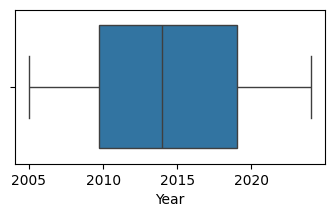

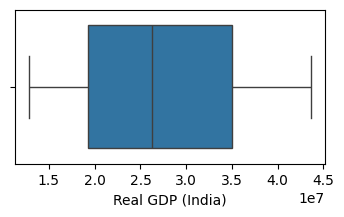

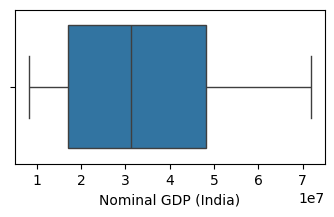

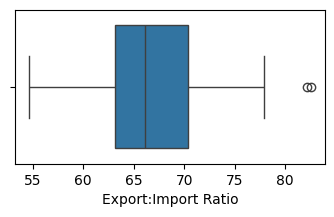

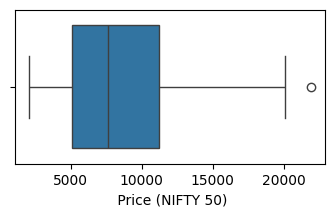

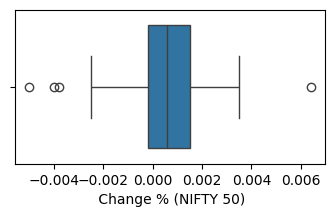

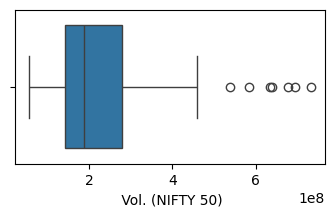

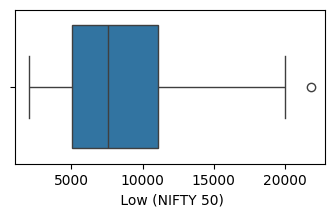

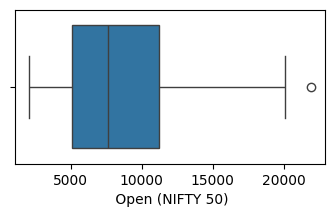

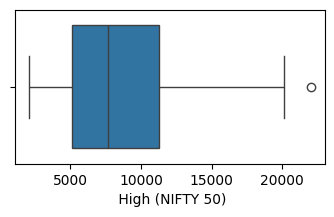

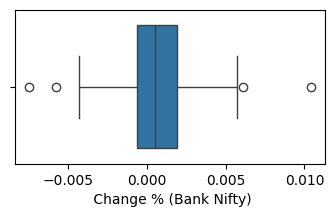

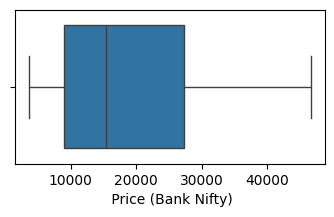

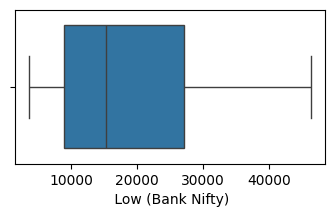

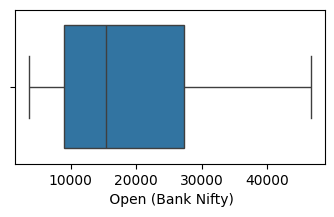

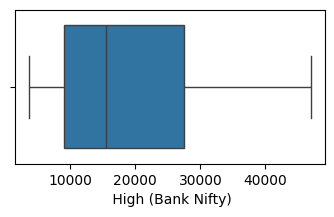

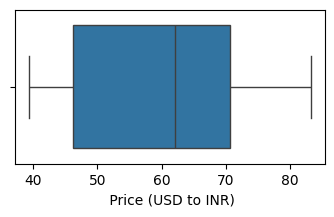

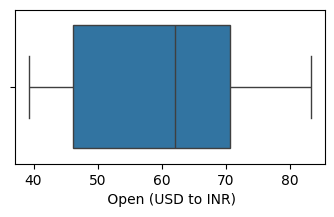

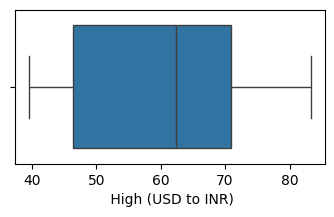

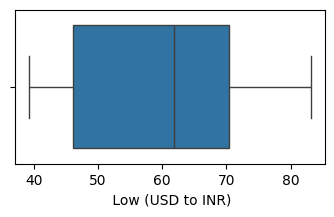

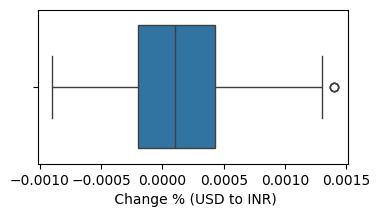

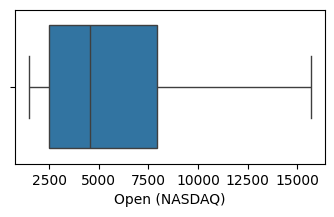

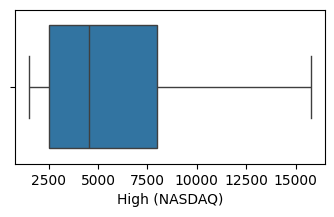

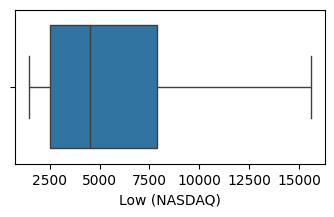

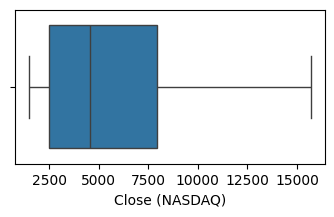

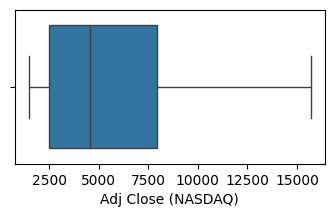

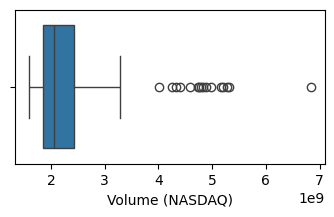

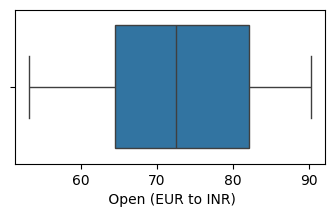

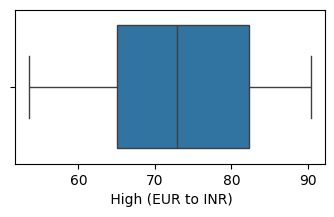

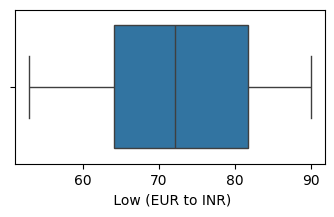

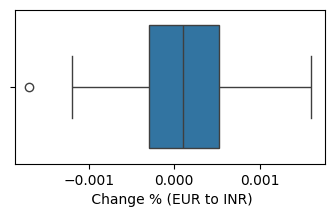

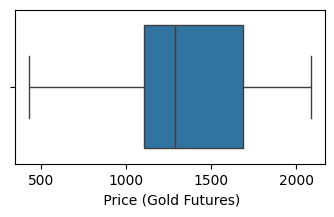

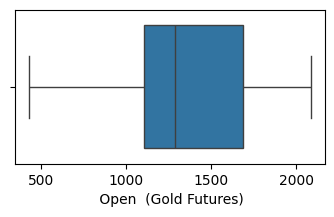

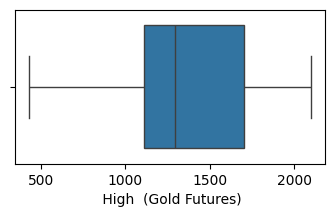

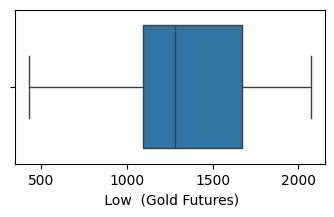

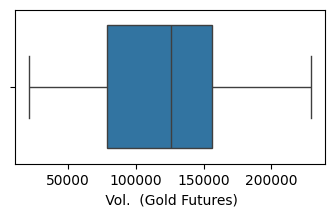

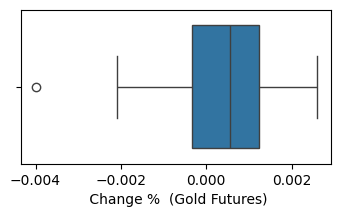

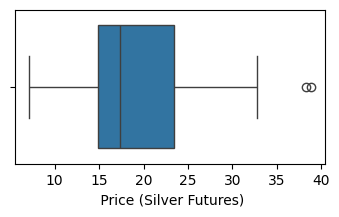

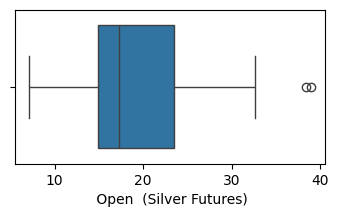

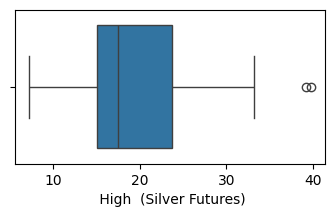

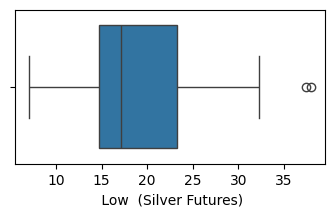

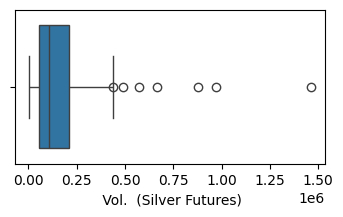

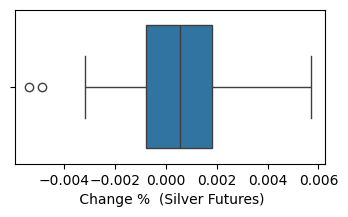

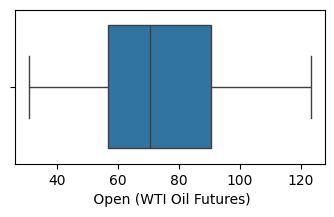

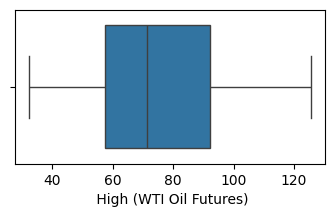

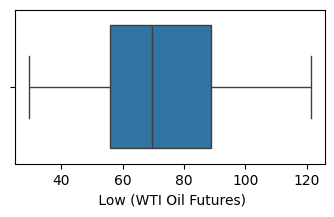

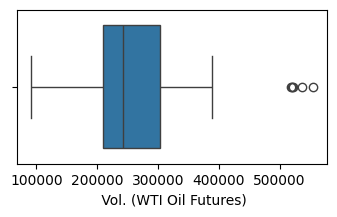

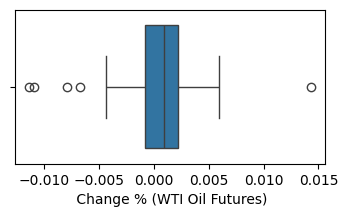

In [13]:
for column in df.select_dtypes(include=['int', 'float']).columns:
    plt.figure(figsize=(4,2))
    sns.boxplot(x=column, data=df, showfliers=True)
    plt.show()

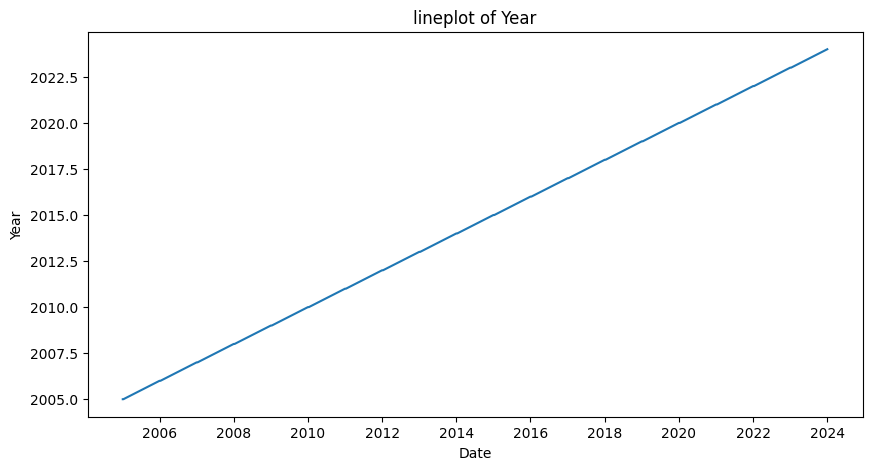

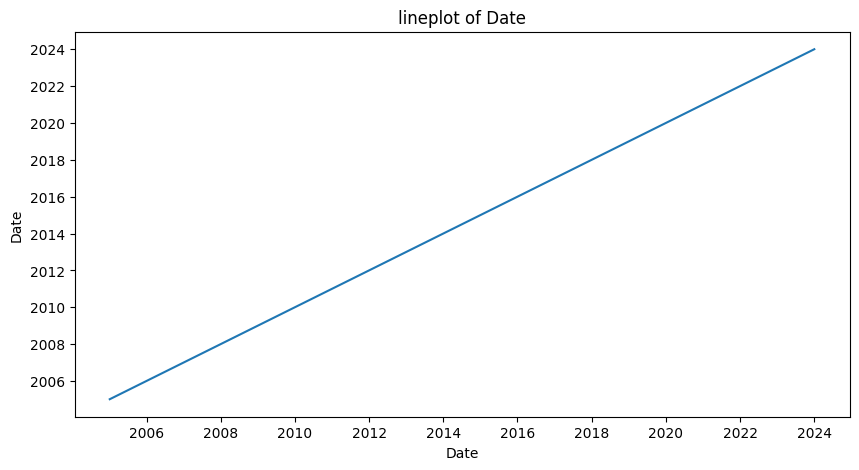

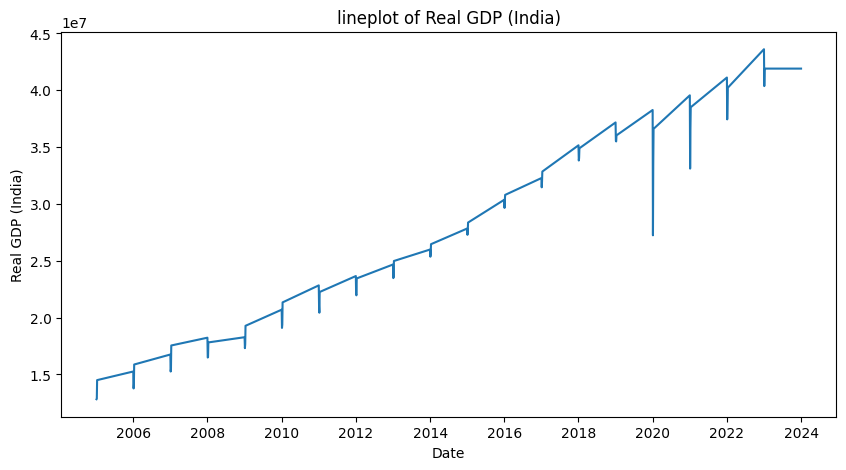

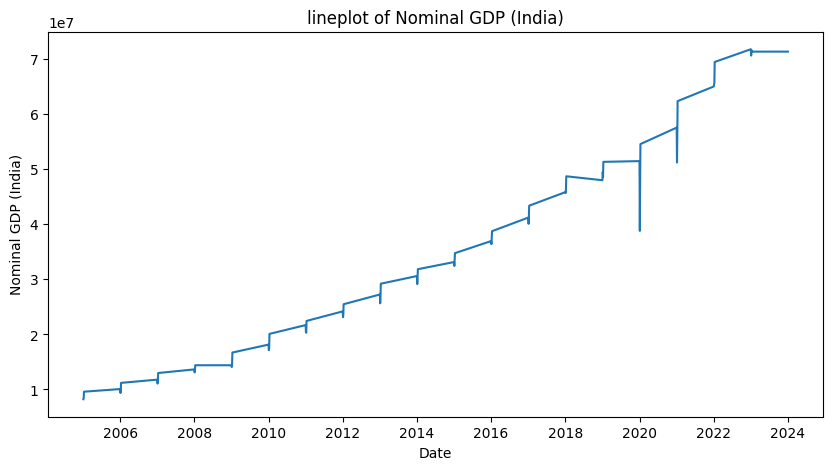

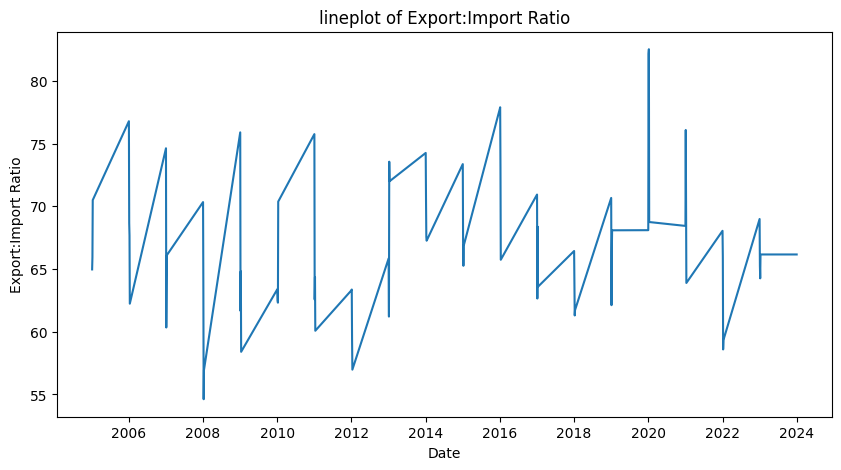

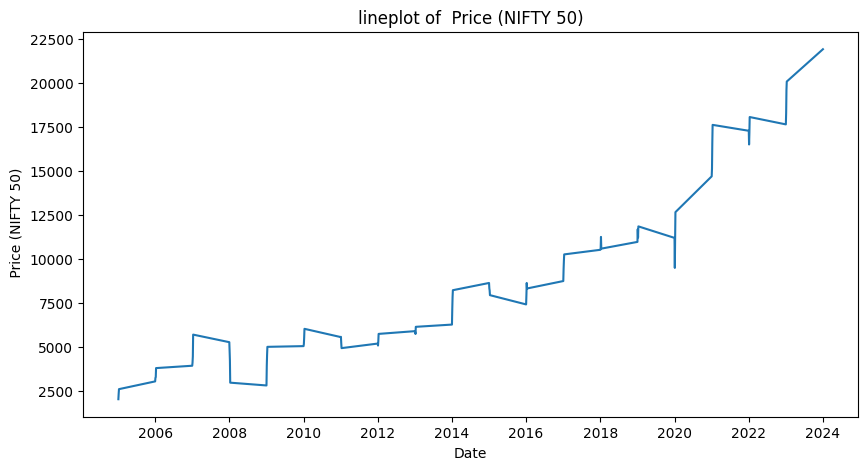

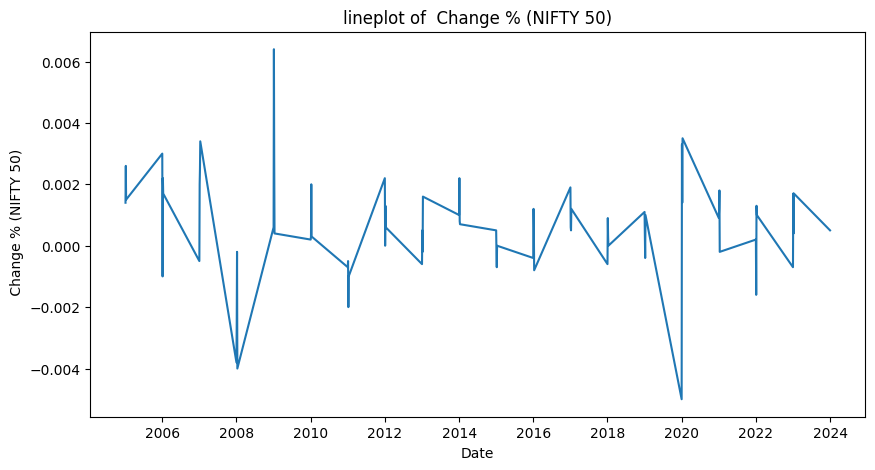

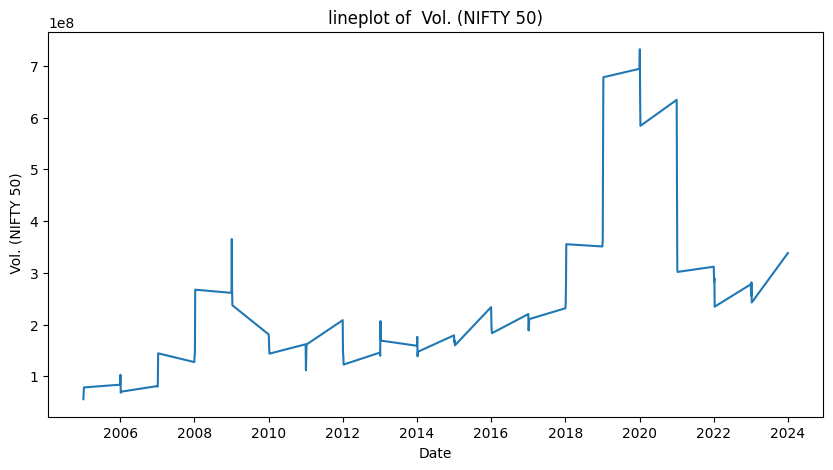

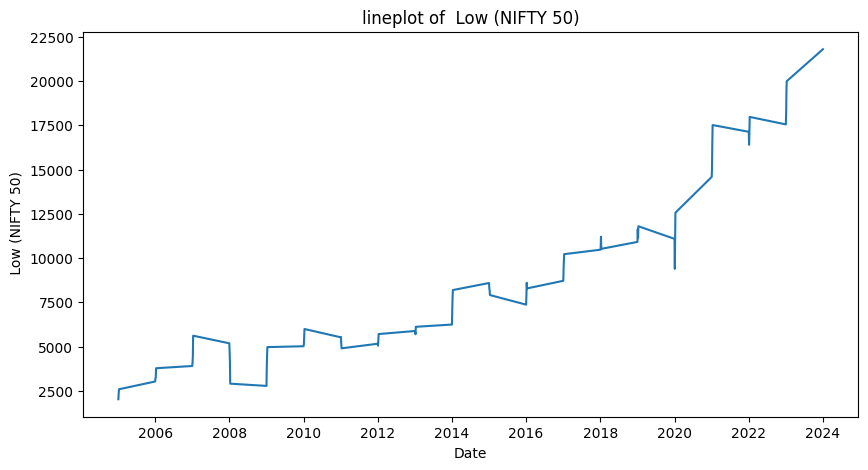

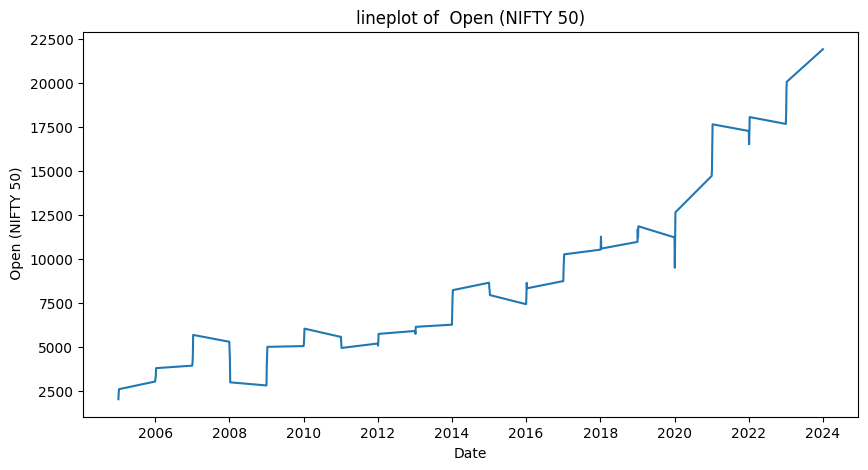

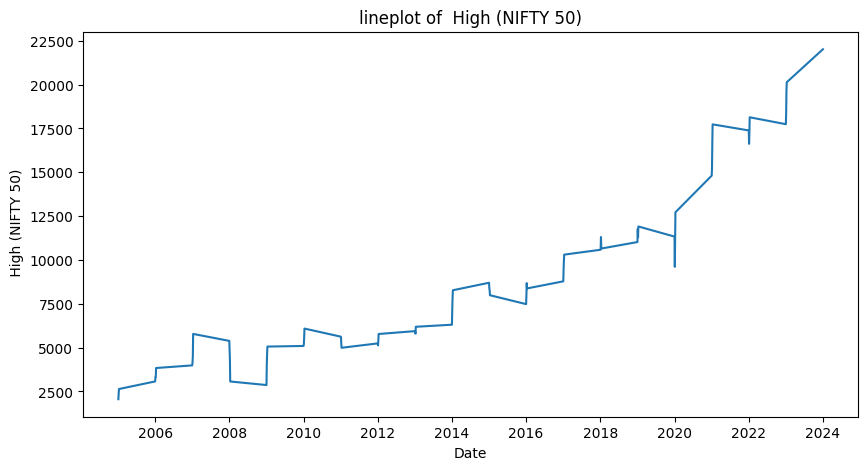

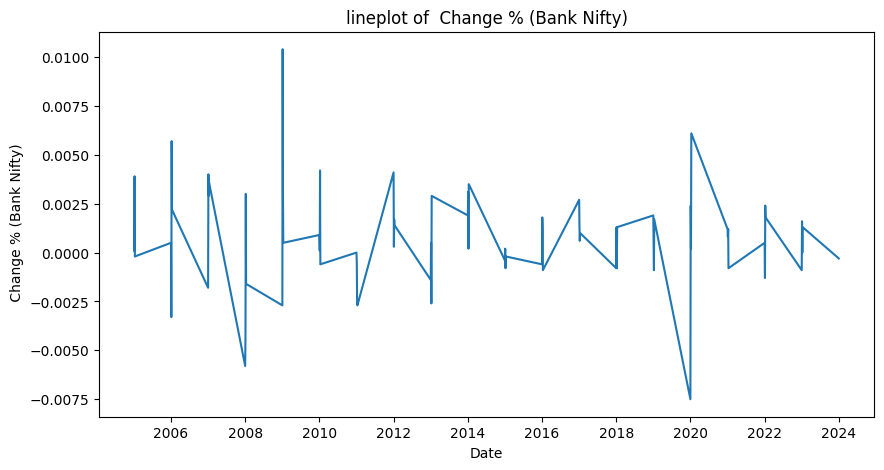

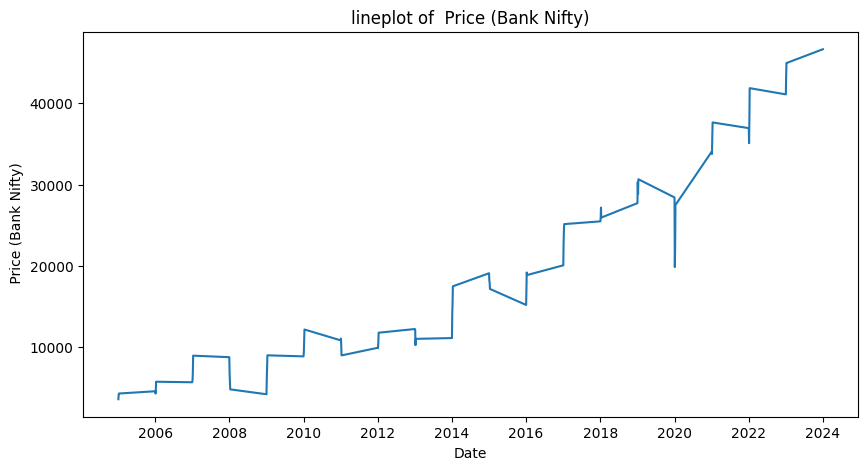

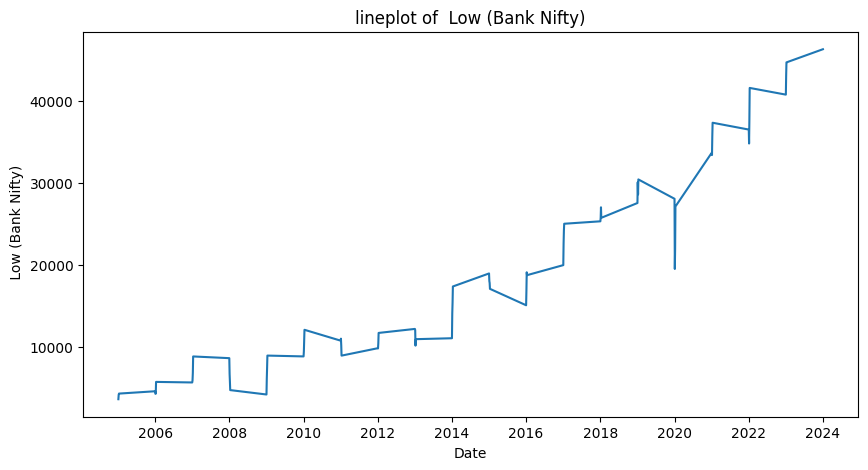

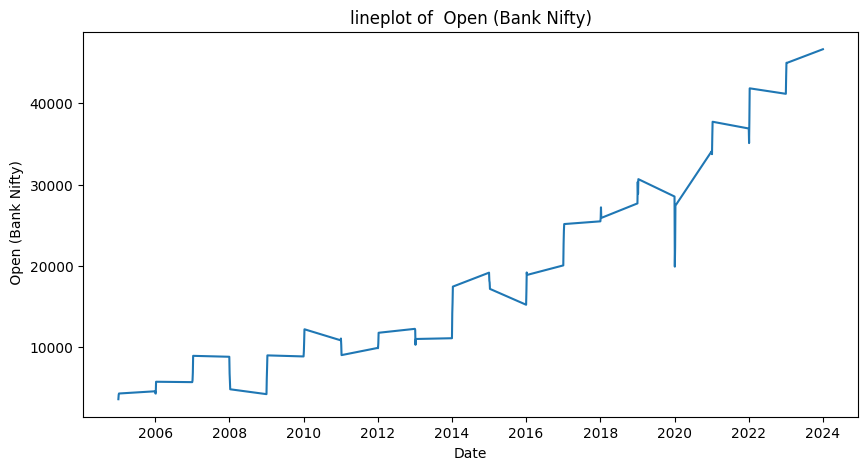

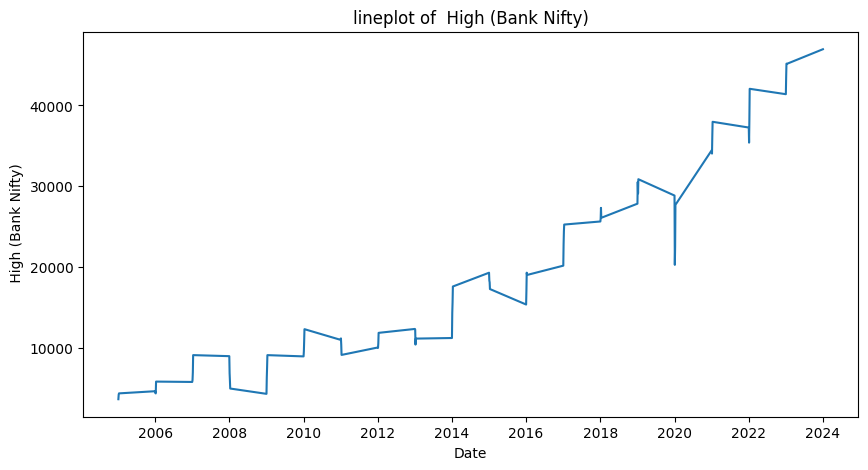

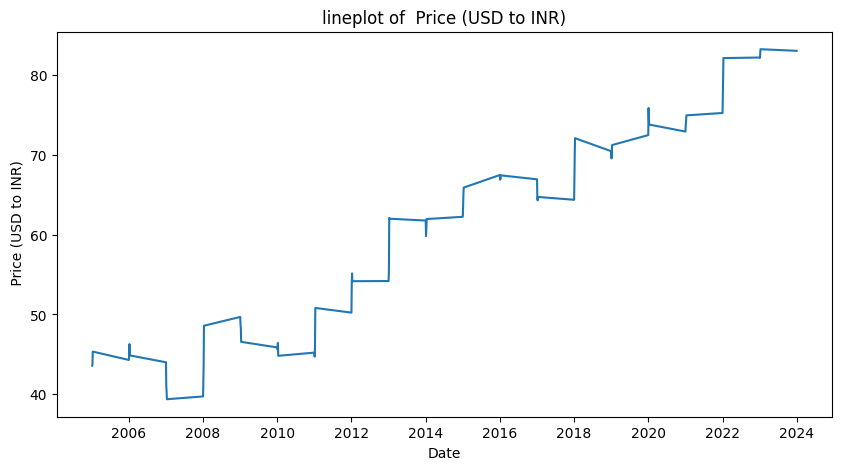

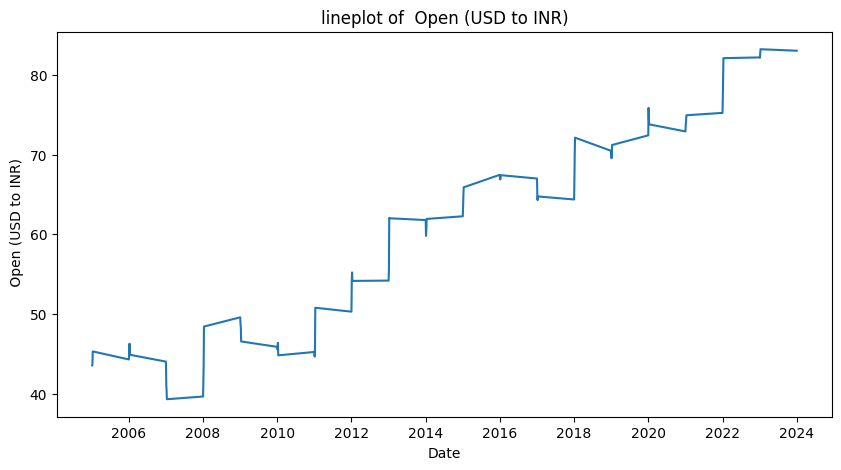

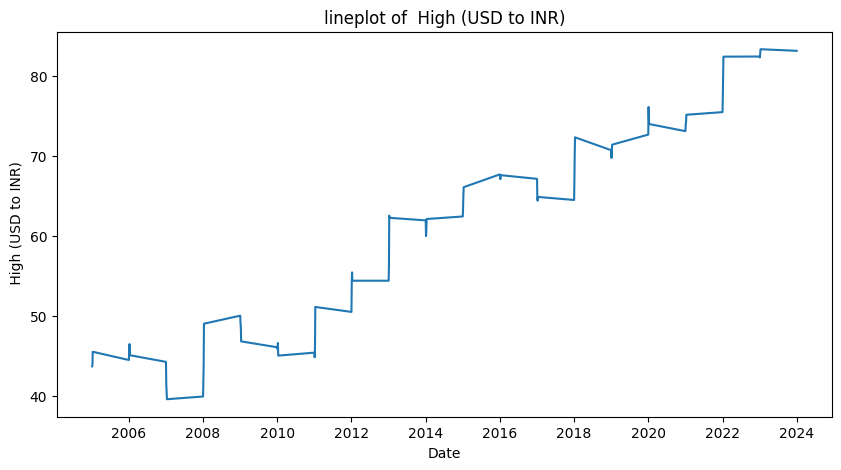

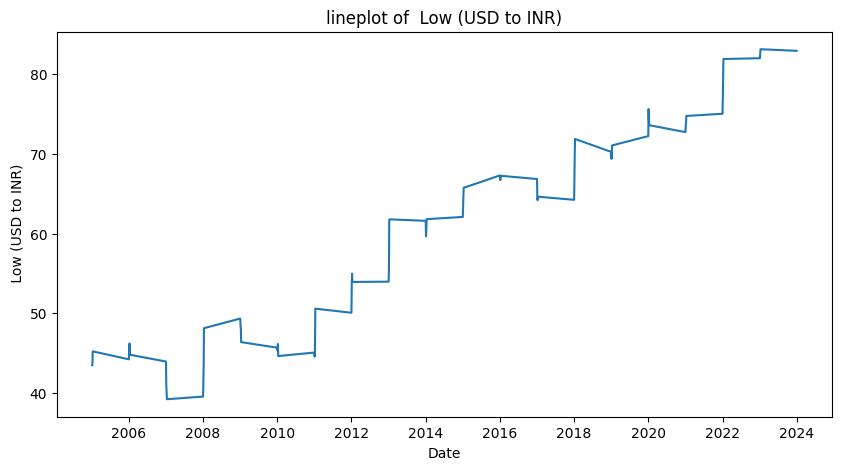

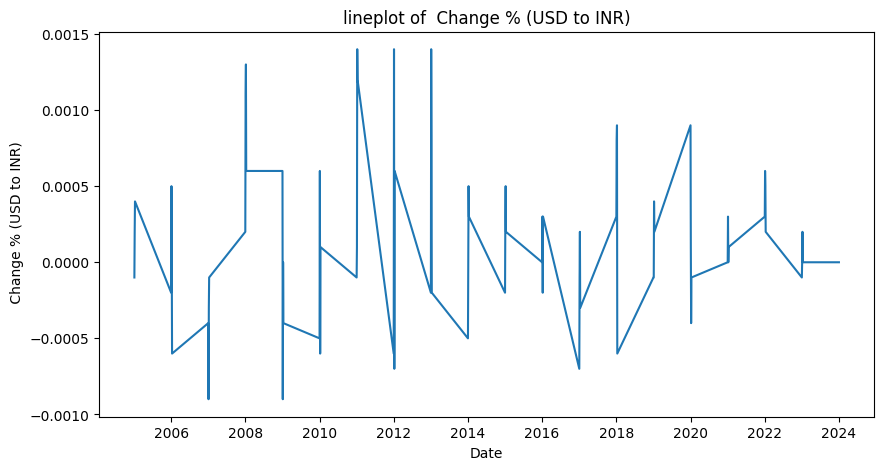

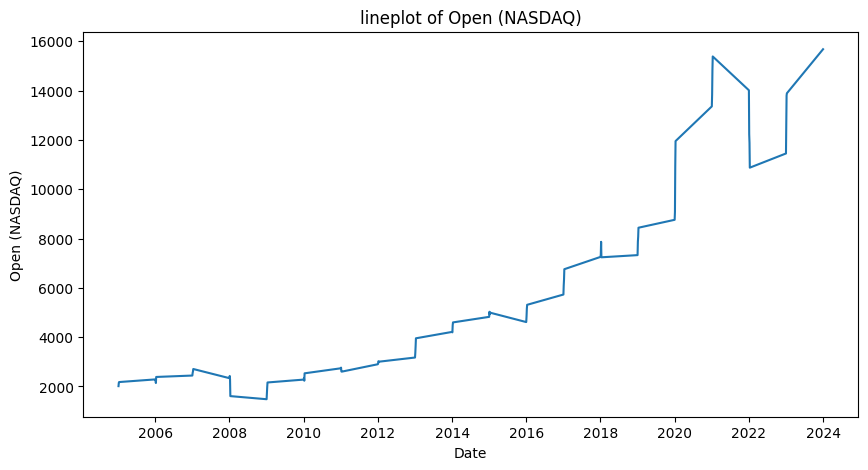

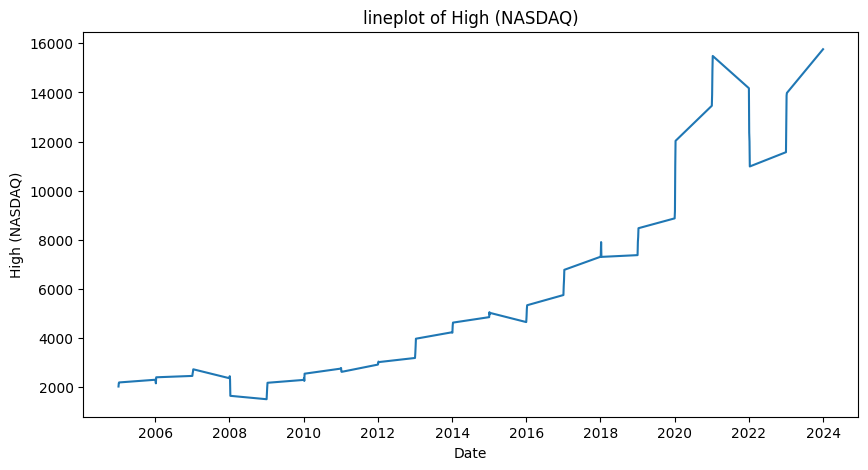

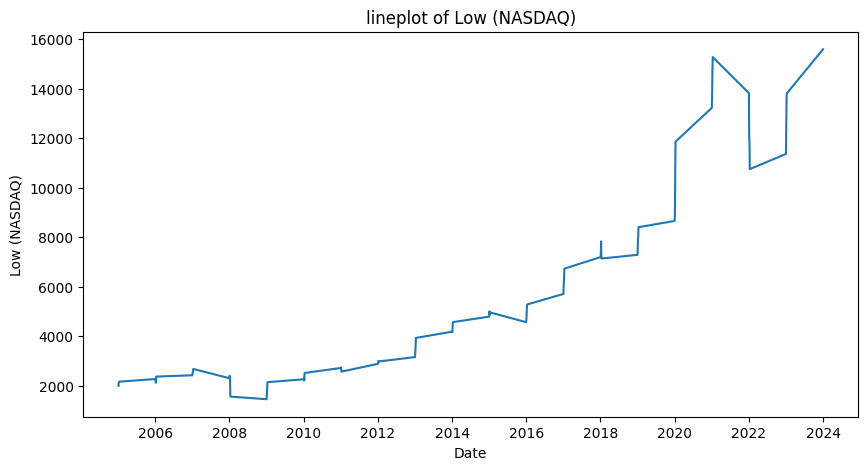

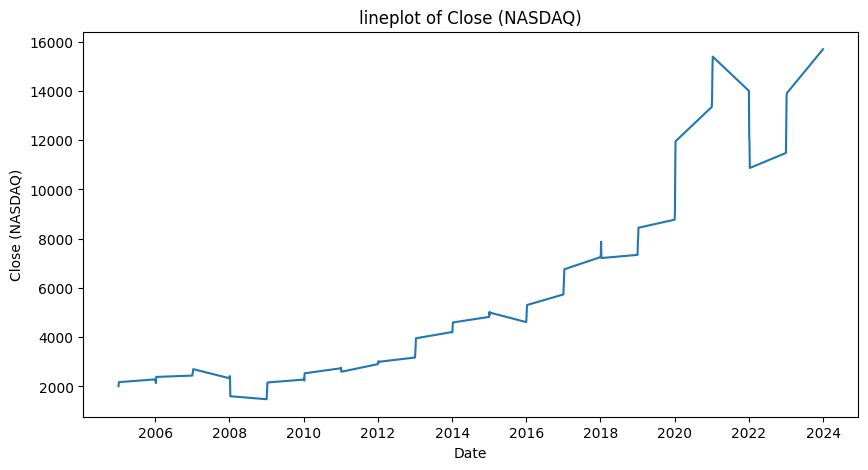

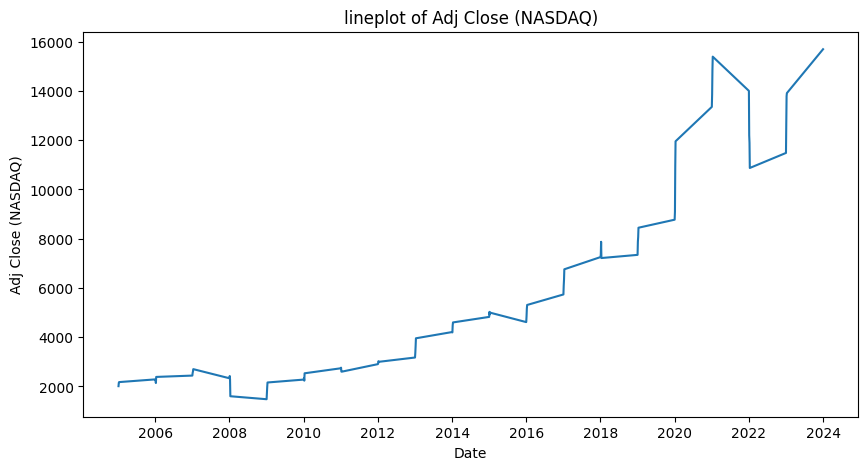

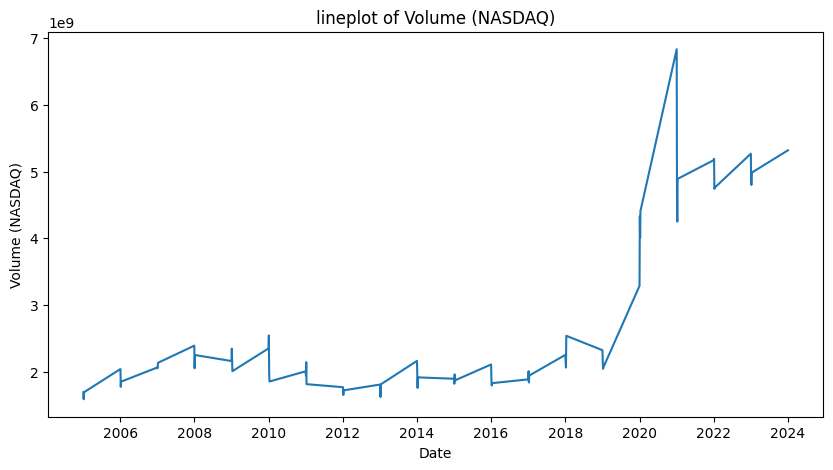

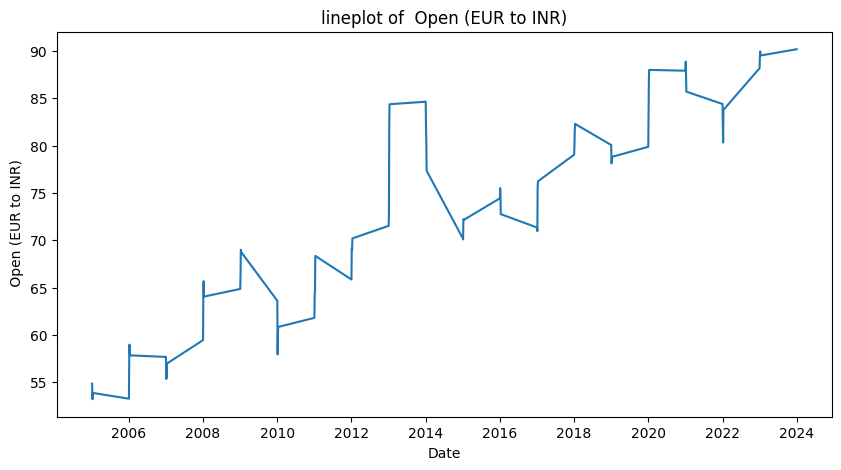

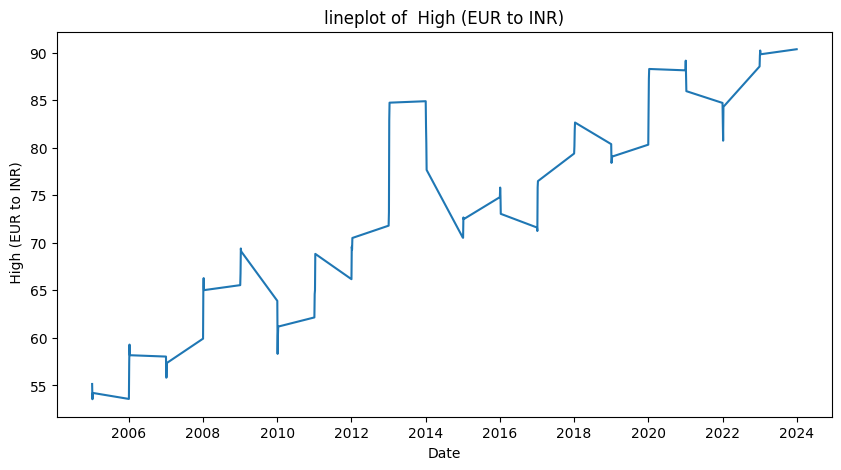

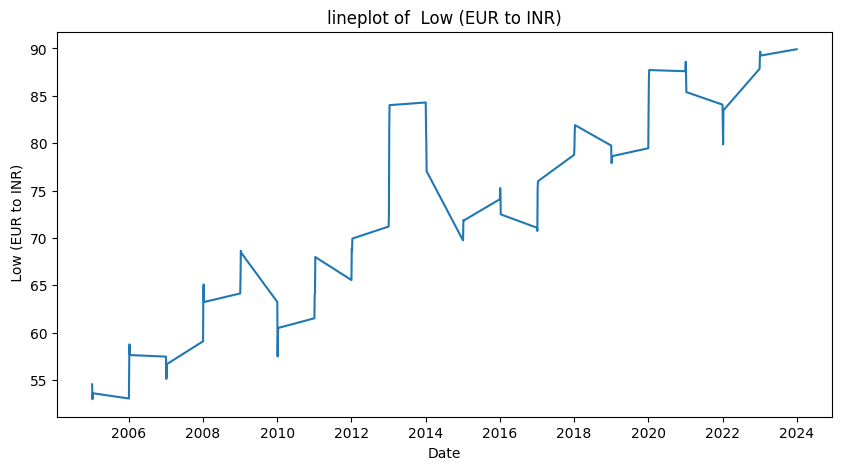

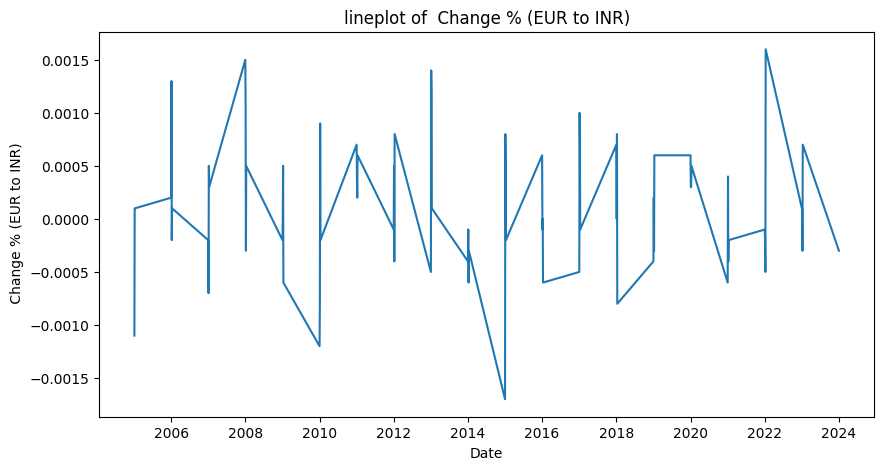

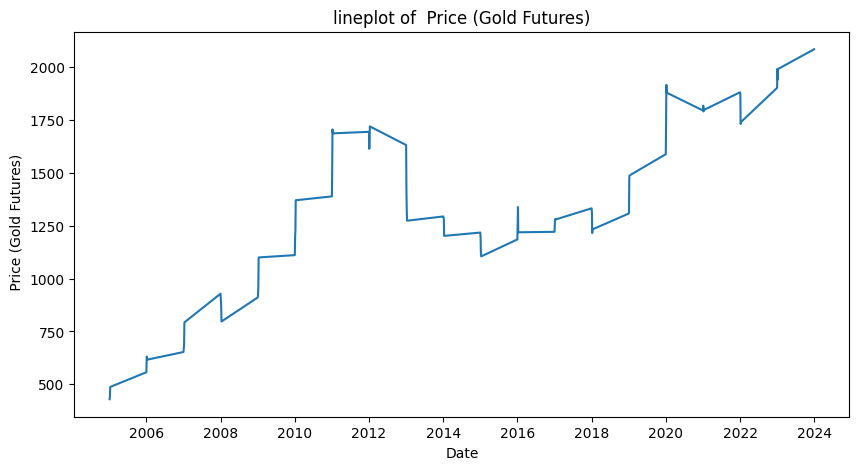

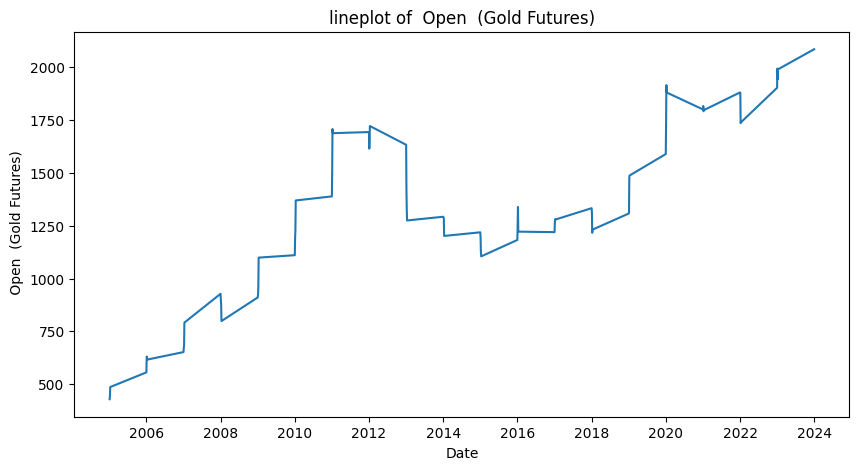

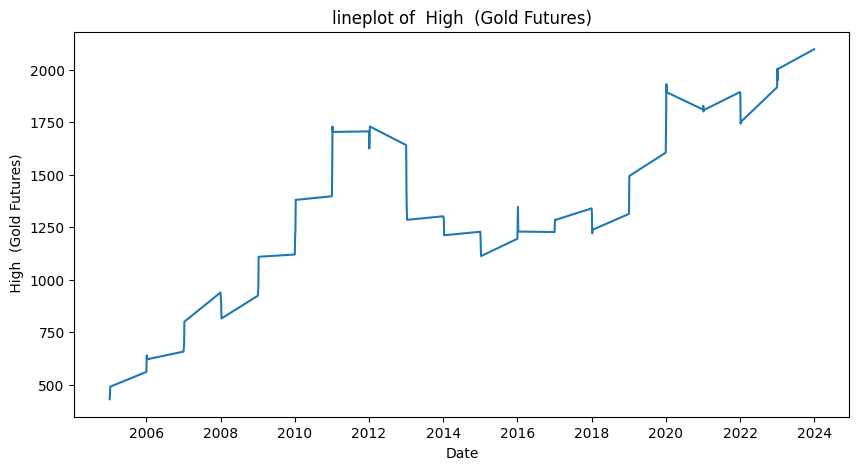

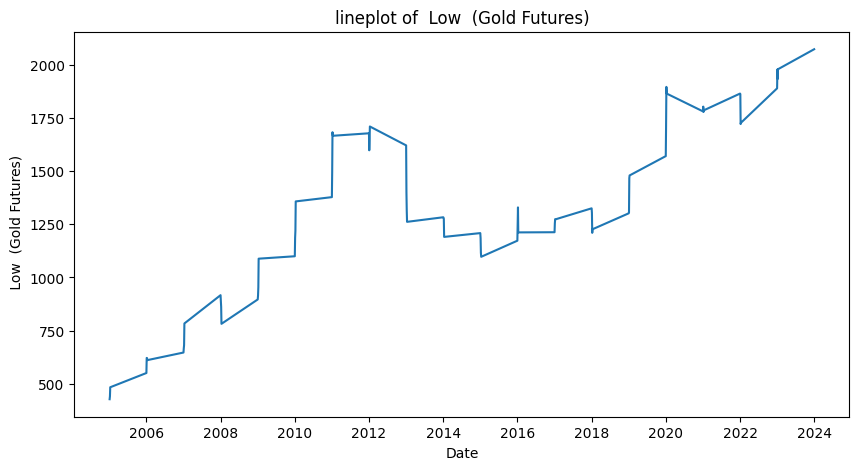

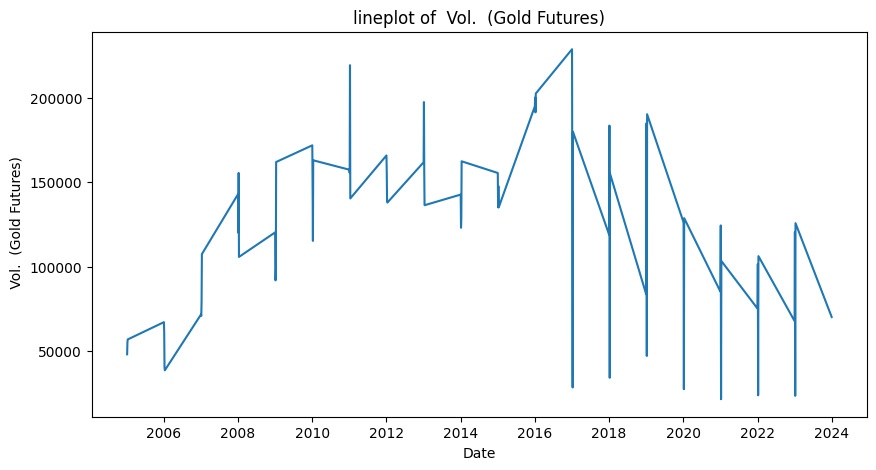

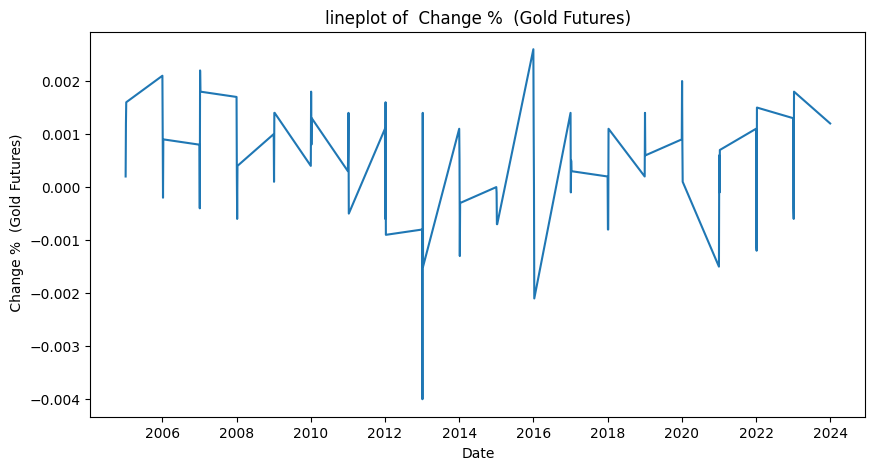

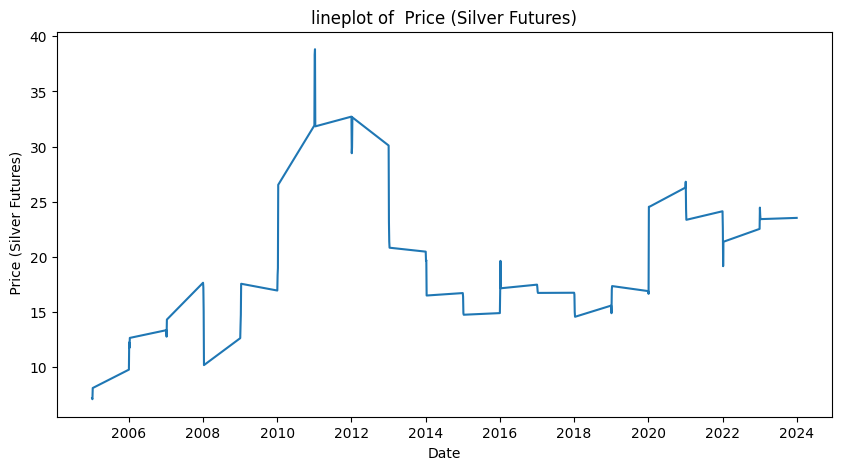

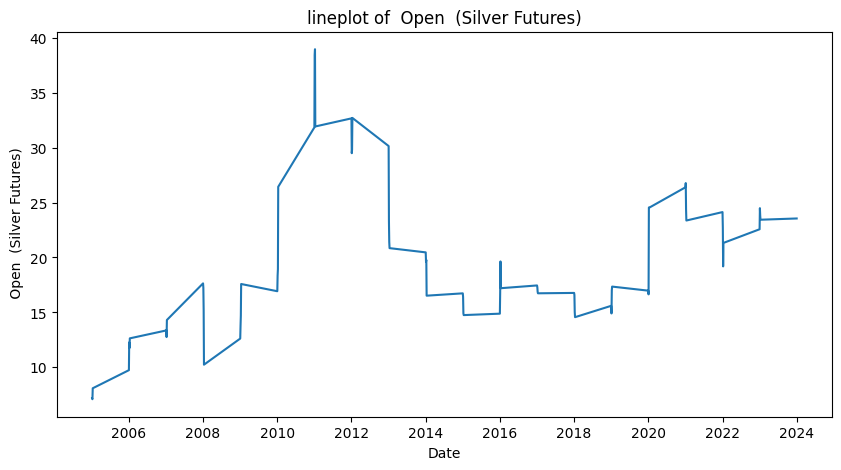

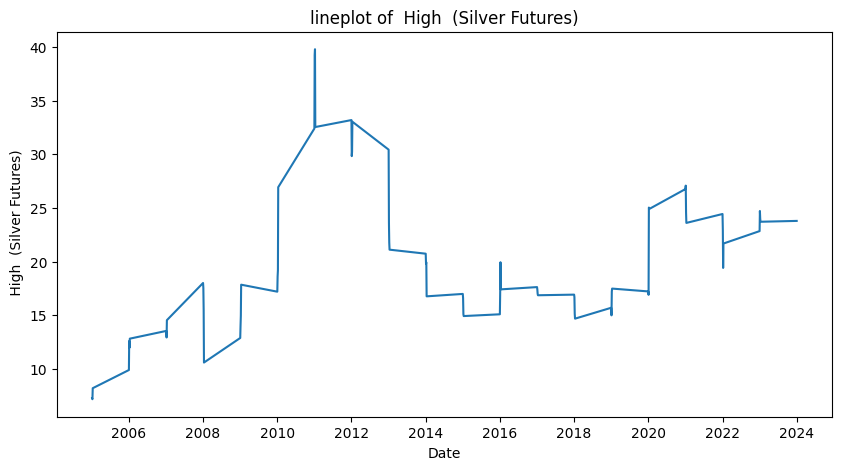

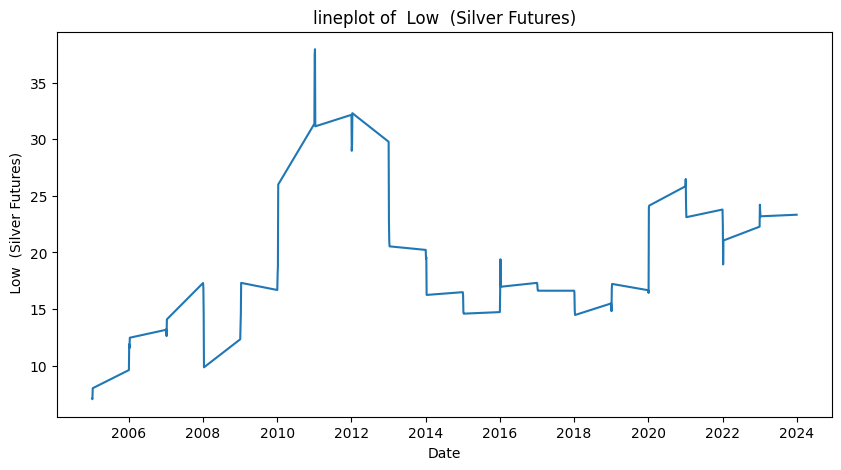

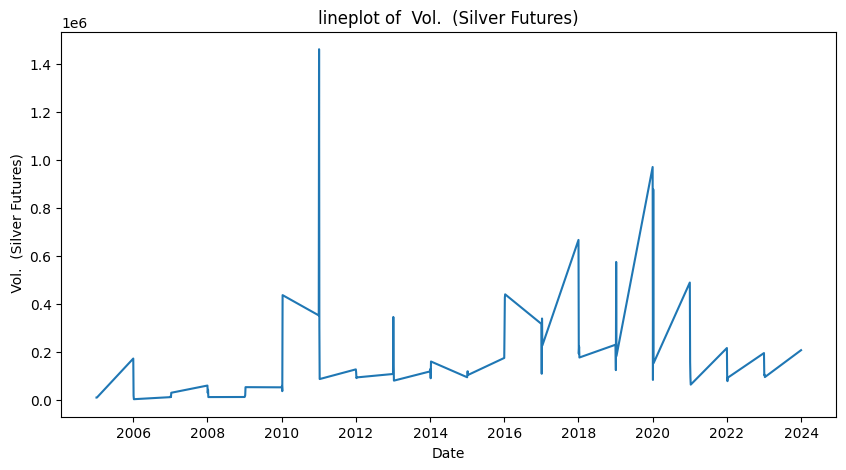

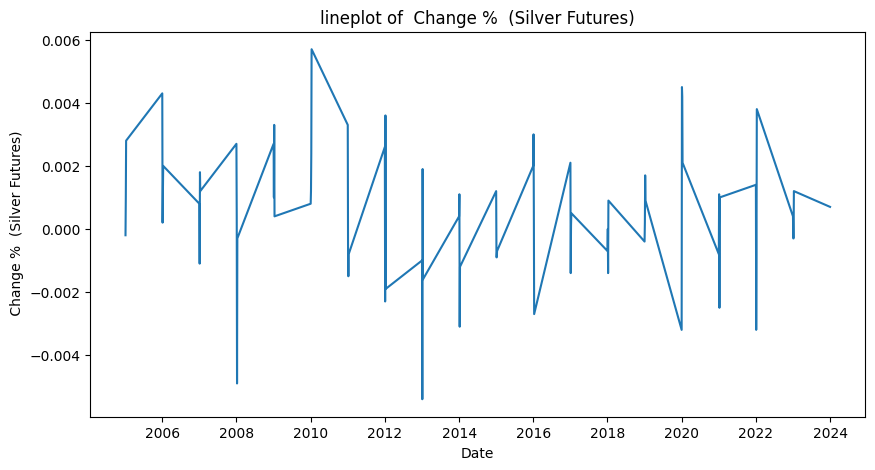

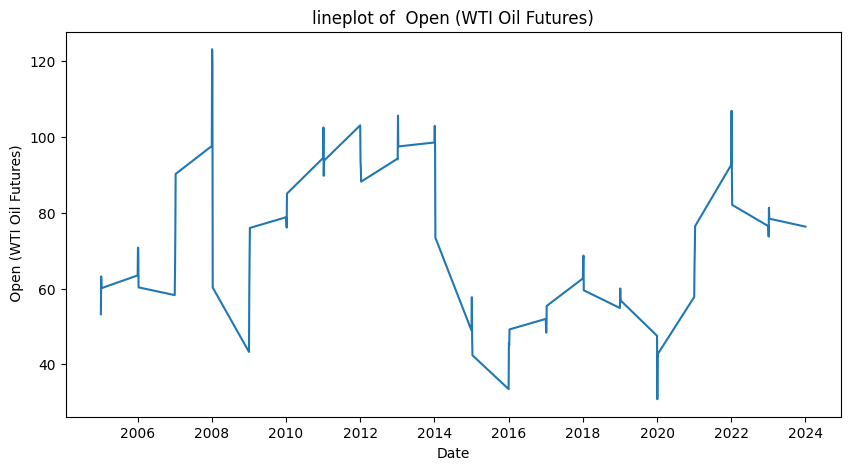

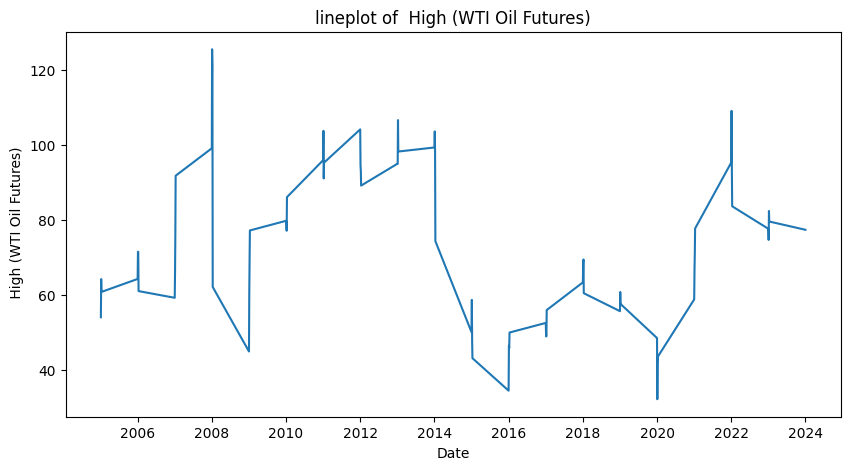

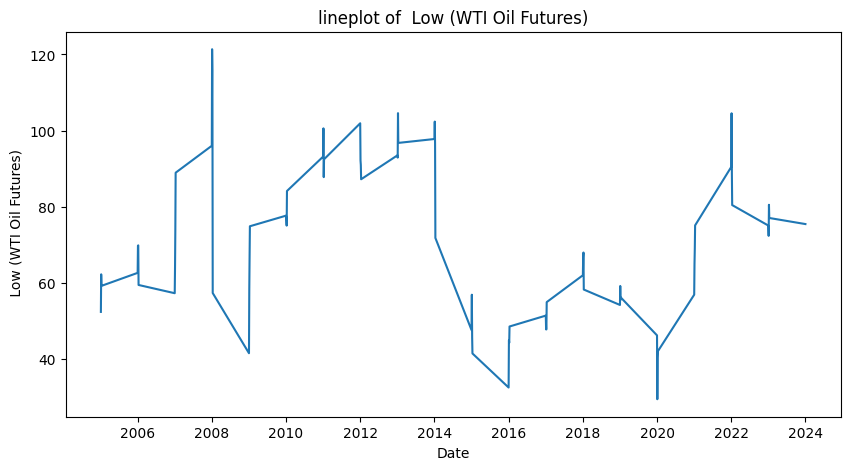

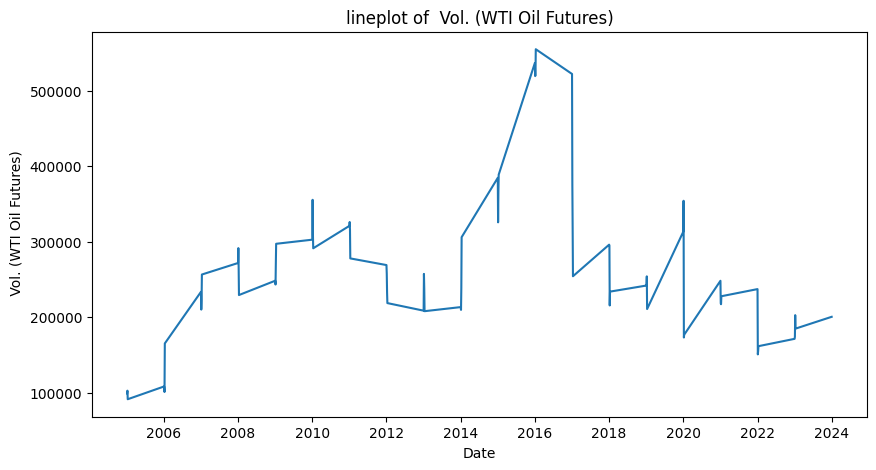

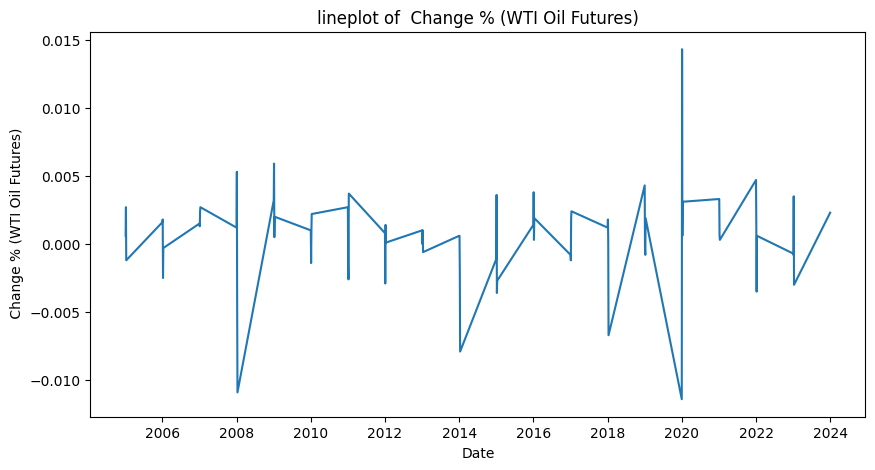

In [14]:
#Cell 11: Line Plots
for column in df.columns:
    plt.figure(figsize=(10, 5))
    sns.lineplot(y = df[column], x= df['Date'])
    plt.title(f'lineplot of {column}')
    plt.show()

In [15]:
numeric_columns = df.select_dtypes(include=['float64', 'int64'])
skewness = numeric_columns.skew()
print(skewness)

Year                           0.000577
Real GDP (India)               0.134482
Nominal GDP (India)            0.476255
Export:Import Ratio            0.551176
 Price (NIFTY 50)              0.935730
 Change % (NIFTY 50)          -0.317881
 Vol. (NIFTY 50)               1.695903
 Low (NIFTY 50)                0.934533
 Open (NIFTY 50)               0.933812
 High (NIFTY 50)               0.935661
 Change % (Bank Nifty)         0.186898
 Price (Bank Nifty)            0.719756
 Low (Bank Nifty)              0.722042
 Open (Bank Nifty)             0.718970
 High (Bank Nifty)             0.717391
 Price (USD to INR)            0.066385
 Open (USD to INR)             0.064868
 High (USD to INR)             0.065300
 Low (USD to INR)              0.068512
 Change % (USD to INR)         0.477244
Open (NASDAQ)                  0.984452
High (NASDAQ)                  0.984580
Low (NASDAQ)                   0.983808
Close (NASDAQ)                 0.984214
Adj Close (NASDAQ)             0.984214


In [16]:
def remove_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 2 * IQR
    upper_bound = Q3 + 2 * IQR
    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
    df_cleaned = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]
    return df_cleaned, outliers

all_removed_outliers = pd.DataFrame()
for column in numeric_columns:
    df_clean, outliers = remove_outliers_iqr(df, column)
    all_removed_outliers = pd.concat([outliers])


In [17]:
all_removed_outliers

Year       Date  Real GDP (India)  Nominal GDP (India)  \
14  2008 2008-01-10        17814300.0           14397200.0   
38  2014 2014-01-10        26459500.0           31849200.0   
59  2020 2020-01-01        38266800.0           51487300.0   
60  2020 2020-01-04        27240200.0           38810500.0   

    Export:Import Ratio   Price (NIFTY 50)   Change % (NIFTY 50)  \
14                56.95            2983.77               -0.0040   
38                67.26            8232.42                0.0007   
59                68.10           11200.82               -0.0050   
60                82.17            9497.54                0.0033   

     Vol. (NIFTY 50)   Low (NIFTY 50)   Open (NIFTY 50)  ...  \
14       267304406.8          2907.07           3000.51  ...   
38       147300172.4          8195.03           8237.41  ...   
59       694239843.8         11087.56          11231.34  ...   
60       732049152.5          9392.86           9507.99  ...   

     Open  (Silver Futures)   High  (Silver Futures)   Low  (Silver Futures)  \
14                10.242578                10.587344                9.854531   
38                16.524385                16.757154               16.248308   
59                16.981719                17.215625               16.662734   
60                16.644453                16.898203               16.425234   

     Vol.  (Silver Futures)   Change %  (Silver Futures)  \
14              11637.67492                      -0.0003   
38             159860.21490                      -0.0012   
59             970717.43550                      -0.0032   
60              83099.45656                       0.0045   

     Open (WTI Oil Futures)   High (WTI Oil Futures)   Low (WTI Oil Futures)  \
14                60.281094                62.152500               57.330781   
38                73.448333                74.368333               71.802273   
59                47.544478                48.527313               46.208955   
60                30.795538                32.206923               29.434615   

     Vol. (WTI Oil Futures)   Change % (WTI Oil Futures)  
14              229392.9688                      -0.0109  
38              306006.5625                      -0.0079  
59              313220.6452                      -0.0114  
60              354224.6032                       0.0143  

[4 rows x 48 columns]

In [18]:
df_clean

Year       Date  Real GDP (India)  Nominal GDP (India)  \
0   2005 2005-01-04       12815900.00           8223800.00   
1   2005 2005-01-07       12860700.00           8404100.00   
2   2005 2005-01-10       14497100.00           9591900.00   
3   2006 2006-01-01       15256400.00          10069300.00   
4   2006 2006-01-04       13765000.00           9356400.00   
..   ...        ...               ...                  ...   
71  2023 2023-01-01       43615100.00          71817400.00   
72  2023 2023-01-04       40371400.00          70665300.00   
73  2023 2023-01-07       41743100.00          71661600.00   
74  2023 2023-01-10       41909866.67          71381433.33   
75  2024 2024-01-01       41909866.67          71381433.33   

    Export:Import Ratio   Price (NIFTY 50)   Change % (NIFTY 50)  \
0             64.970000            2044.32                0.0014   
1             65.950000            2370.57                0.0026   
2             70.500000            2616.55                0.0015   
3             76.790000            3056.08                0.0030   
4             68.670000            3262.84               -0.0010   
..                  ...                ...                   ...   
71            68.990000           17643.01               -0.0007   
72            65.240000           18284.98                0.0017   
73            64.260000           19597.92                0.0004   
74            66.163333           20074.35                0.0017   
75            66.163333           21908.93                0.0005   

     Vol. (NIFTY 50)   Low (NIFTY 50)   Open (NIFTY 50)  ...  \
0       5.560908e+07          2028.44           2041.51  ...   
1       6.880032e+07          2348.82           2365.16  ...   
2       7.841597e+07          2590.75           2612.68  ...   
3       8.373508e+07          3030.28           3046.38  ...   
4       1.027690e+08          3202.37           3267.69  ...   
..               ...              ...               ...  ...   
71      2.777162e+08         17552.65          17677.07  ...   
72      2.556888e+08         18209.10          18281.09  ...   
73      2.813119e+08         19522.97          19608.72  ...   
74      2.425116e+08         19993.81          20069.79  ...   
75      3.381382e+08         21798.79          21919.33  ...   

     Open  (Silver Futures)   High  (Silver Futures)   Low  (Silver Futures)  \
0                  7.176094                 7.253281                7.097422   
1                  7.099297                 7.169531                7.038672   
2                  8.097097                 8.197258                8.011774   
3                  9.743871                 9.890403                9.612984   
4                 12.271111                12.591587               11.890635   
..                      ...                      ...                     ...   
71                22.570692                22.837100               22.275108   
72                24.490148                24.711508               24.214975   
73                23.783621                23.991015               23.580727   
74                23.438231                23.708292               23.191385   
75                23.551836                23.787194               23.331119   

     Vol.  (Silver Futures)   Change %  (Silver Futures)  \
0               9512.384942                      -0.0002   
1               9544.512106                       0.0010   
2              10534.227100                       0.0028   
3             172278.659100                       0.0043   
4              17668.635250                       0.0002   
..                      ...                          ...   
71            195088.954300                       0.0004   
72            103609.944000                      -0.0003   
73            105226.969100                      -0.0003   
74             94973.250680                       0.0012   
75            207129.181000                       0.

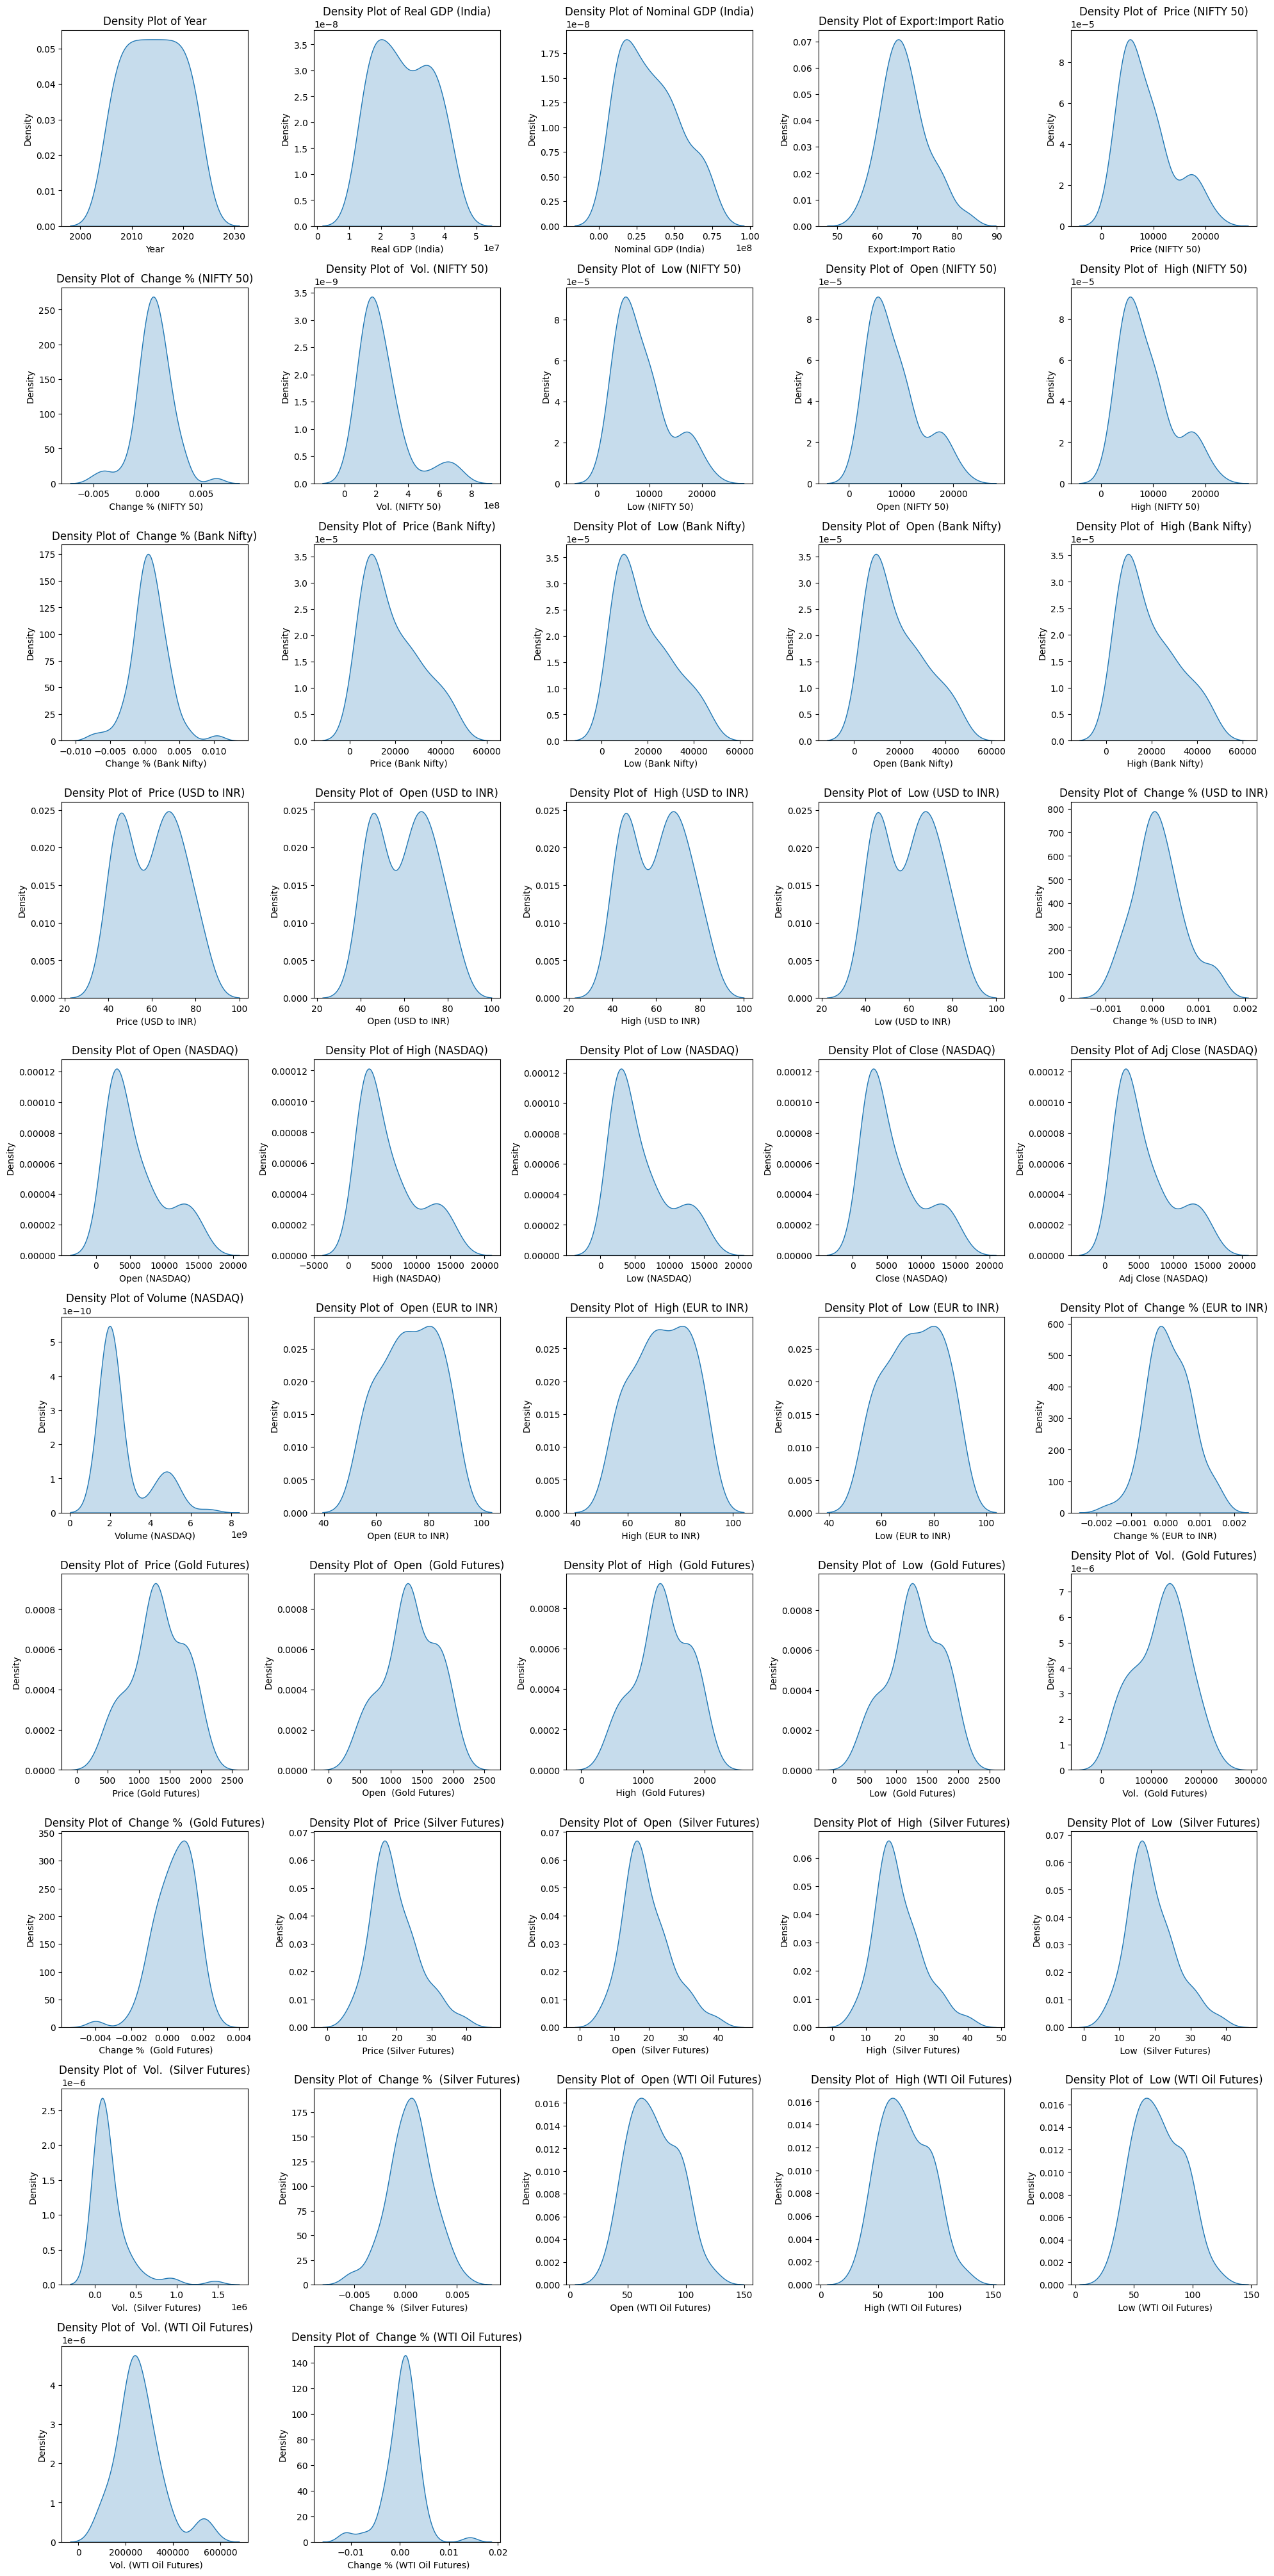

In [19]:
num_columns = len(numeric_columns)
num_rows = (num_columns // 5) + (num_columns % 3 > 0)

plt.figure(figsize=(20, 4 * num_rows))
for i, column in enumerate(numeric_columns):
    plt.subplot(num_rows, 5, i + 1)
    sns.kdeplot(df[column], fill=True)
    plt.title(f'Density Plot of {column}')
    plt.xlabel(column)
    plt.ylabel('Density')

plt.tight_layout()
plt.show()

In [20]:
for column in numeric_columns:
    kurt = kurtosis(df[column])
    print(column, kurt)


Year -1.1917492895078636
Real GDP (India) -1.2207719593580437
Nominal GDP (India) -0.8986065299404635
Export:Import Ratio 0.14653145692267433
 Price (NIFTY 50) -0.10316994248058498
 Change % (NIFTY 50) 2.571513739585148
 Vol. (NIFTY 50) 2.357324969278963
 Low (NIFTY 50) -0.10200197575145431
 Open (NIFTY 50) -0.10714746511314743
 High (NIFTY 50) -0.10535402752752976
 Change % (Bank Nifty) 2.7159790721541563
 Price (Bank Nifty) -0.6364003689080167
 Low (Bank Nifty) -0.6281303129947609
 Open (Bank Nifty) -0.6377565269516468
 High (Bank Nifty) -0.6439613852141535
 Price (USD to INR) -1.2903404017693592
 Open (USD to INR) -1.2914662086515654
 High (USD to INR) -1.28938498370651
 Low (USD to INR) -1.2917438363653313
 Change % (USD to INR) 0.07400946430303934
Open (NASDAQ) -0.36325019446851003
High (NASDAQ) -0.3697529483445732
Low (NASDAQ) -0.3576363929668829
Close (NASDAQ) -0.3636363112129244
Adj Close (NASDAQ) -0.3636363112129244
Volume (NASDAQ) 1.020074186206518
 Open (EUR to INR) -1.11818

# Feature Engineering

## Method 1: (Multicollinearity accounted for all variables and dynamic weights used for correlation, KPCA, PCA and VIF results)

In [21]:
correlation_matrix = df.drop([' Price (NIFTY 50)', 'Date'], axis=1).corr()
correlations = df.corr()[' Price (NIFTY 50)'].drop([' Price (NIFTY 50)', 'Date'])
high_corr_with_target = correlations[correlations.abs() > 0.7]
top_features_df = high_corr_with_target.reset_index()
top_features_df.columns = ['Feature', 'Correlation with Price (NIFTY 50)']
print(top_features_df)

                  Feature  Correlation with Price (NIFTY 50)
0                    Year                           0.932178
1        Real GDP (India)                           0.933415
2     Nominal GDP (India)                           0.972449
3          Low (NIFTY 50)                           0.999992
4         Open (NIFTY 50)                           0.999998
5         High (NIFTY 50)                           0.999991
6      Price (Bank Nifty)                           0.989832
7        Low (Bank Nifty)                           0.989652
8       Open (Bank Nifty)                           0.989772
9       High (Bank Nifty)                           0.989942
10     Price (USD to INR)                           0.904201
11      Open (USD to INR)                           0.903989
12      High (USD to INR)                           0.903606
13       Low (USD to INR)                           0.904628
14          Open (NASDAQ)                           0.965534
15          High (NASDAQ

In [22]:
X = df.drop(columns=['Date', ' Price (NIFTY 50)'], errors='ignore')
X = X.apply(pd.to_numeric, errors='coerce')
vif = pd.DataFrame()
vif['Feature VIF'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
top_features_vif = vif.sort_values(by='VIF', ascending=True).head(30)
top_features_vif.reset_index(drop=True, inplace=True)
top_features_vif

/usr/local/lib/python3.11/dist-packages/statsmodels/stats/outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)


Feature VIF           VIF
0         Change % (EUR to INR)  6.073031e+00
1    Change % (WTI Oil Futures)  8.137386e+00
2         Change % (USD to INR)  9.650166e+00
3        Vol.  (Silver Futures)  1.133484e+01
4         Change % (Bank Nifty)  2.150635e+01
5    Change %  (Silver Futures)  2.568685e+01
6      Change %  (Gold Futures)  2.630408e+01
7          Vol.  (Gold Futures)  2.727462e+01
8           Change % (NIFTY 50)  3.351204e+01
9               Vol. (NIFTY 50)  5.947446e+01
10       Vol. (WTI Oil Futures)  7.762889e+01
11              Volume (NASDAQ)  1.521615e+02
12          Export:Import Ratio  7.130506e+02
13                         Year  2.053316e+03
14             Real GDP (India)  3.844756e+03
15          Nominal GDP (India)  4.054739e+03
16        Low (WTI Oil Futures)  5.767739e+05
17       High (WTI Oil Futures)  8.701168e+05
18       Open (WTI Oil Futures)  2.532590e+06
19        Low  (Silver Futures)  3.649408e+06
20       High  (Silver Futures)  4.031180e+06
21           Price (Bank Nifty)  6.132246e+06
22       Open  (Silver Futures)  6.788676e+06
23             Low (Bank Nifty)  7.777414e+06
24            High (Bank Nifty)  8.219991e+06
25          Low  (Gold Futures)  9.023254e+06
26         High  (Gold Futures)  9.073023e+06
27               Low (NIFTY 50)  1.021512e+07
28       Price (Silver Futures)  1.048521e+07
29              High (NIFTY 50)  1.143734e+07

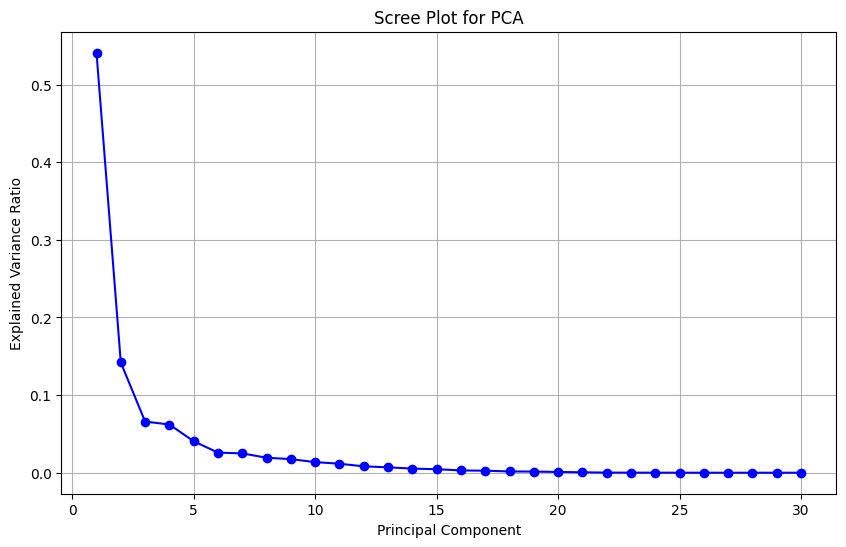

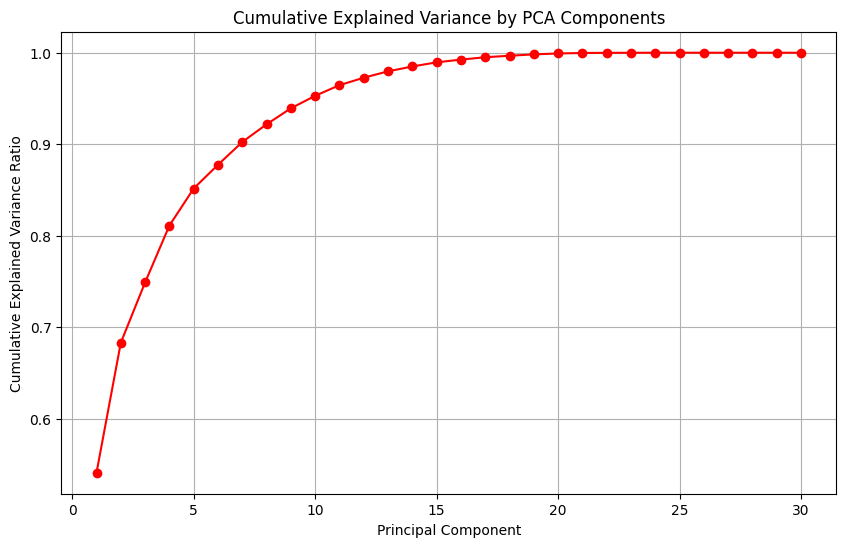

                   PCA Features  Feature Importance PCA
0               Volume (NASDAQ)                4.035950
1           Export:Import Ratio                3.660711
2               Vol. (NIFTY 50)                3.658832
3         Low (WTI Oil Futures)                3.635925
4      Change %  (Gold Futures)                3.558172
5        Vol.  (Silver Futures)                3.555747
6    Change % (WTI Oil Futures)                3.554292
7        Vol. (WTI Oil Futures)                3.542852
8          Vol.  (Gold Futures)                3.519951
9         Change % (Bank Nifty)                3.475933
10          Change % (NIFTY 50)                3.446769
11        Change % (USD to INR)                3.441878
12             Low (EUR to INR)                3.343704
13   Change %  (Silver Futures)                3.314189
14       High (WTI Oil Futures)                3.309774
15        Low  (Silver Futures)                3.215796
16         High  (Gold Futures)                3

In [23]:
X = df.drop(columns=['Date', ' Price (NIFTY 50)'], errors='ignore')
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X.dropna())

pca = PCA(n_components=30)
pca.fit(X_scaled)
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(pca.explained_variance_ratio_) + 1), pca.explained_variance_ratio_, marker='o', linestyle='-', color='b')
plt.title('Scree Plot for PCA')
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance Ratio')
plt.grid()
plt.show()

plt.figure(figsize=(10, 6))
plt.plot(range(1, len(pca.explained_variance_ratio_) + 1), np.cumsum(pca.explained_variance_ratio_), marker='o', linestyle='-', color='r')
plt.title('Cumulative Explained Variance by PCA Components')
plt.xlabel('Principal Component')
plt.ylabel('Cumulative Explained Variance Ratio')
plt.grid()
plt.show()

pca_loadings = pd.DataFrame(abs(pca.components_), columns=X.columns)
feature_scores = pca_loadings.abs().sum(axis=0)

top_pca_features = feature_scores.nlargest(30).index
top_pca_df = pd.DataFrame(top_pca_features, columns=['PCA Features'])
top_pca_df['Feature Importance PCA'] = feature_scores[top_pca_features].values
print(top_pca_df)

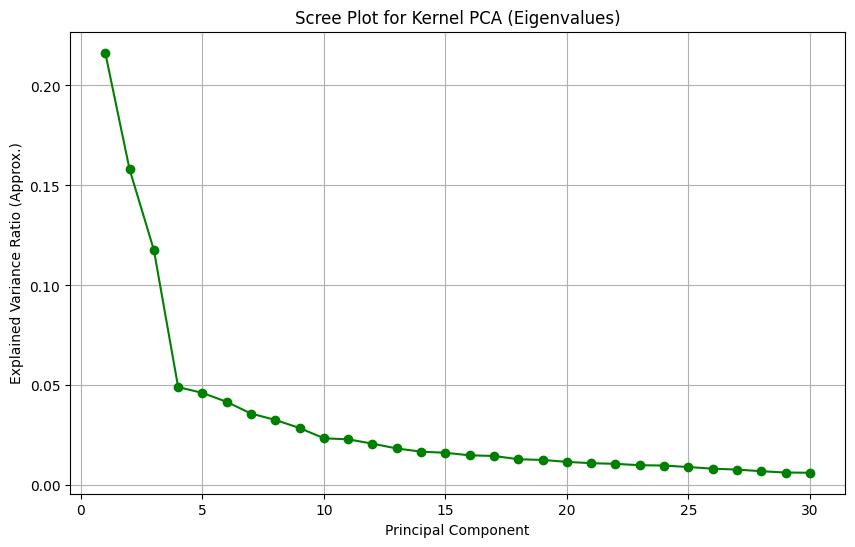

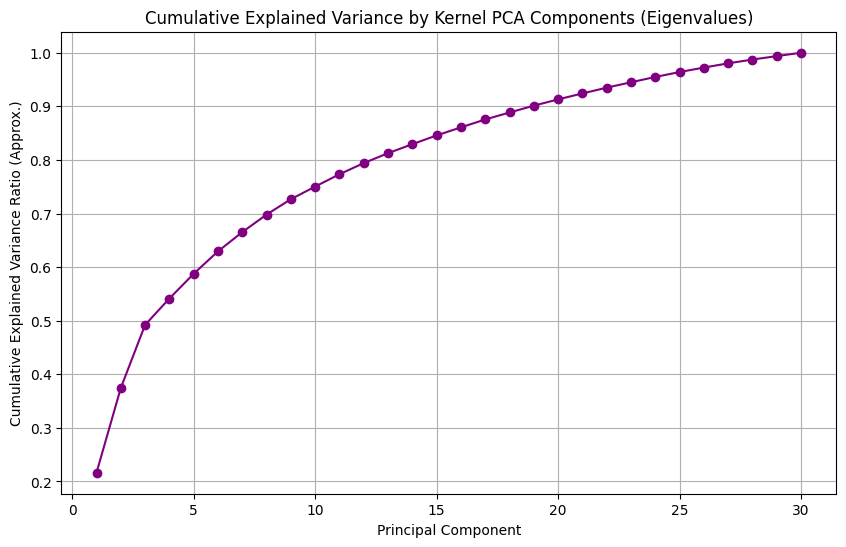

            Kernel PCA Features  Feature Importance KPCA
0      Change %  (Gold Futures)                 4.510015
1        Vol.  (Silver Futures)                 4.159292
2    Change % (WTI Oil Futures)                 4.049784
3         Change % (Bank Nifty)                 3.992300
4    Change %  (Silver Futures)                 3.949195
5          Vol.  (Gold Futures)                 3.891852
6           Export:Import Ratio                 3.849874
7           Change % (NIFTY 50)                 3.836814
8         Change % (EUR to INR)                 3.791205
9               Vol. (NIFTY 50)                 3.751626
10        Change % (USD to INR)                 3.541851
11       High (WTI Oil Futures)                 3.220408
12       Open (WTI Oil Futures)                 3.211048
13        Low (WTI Oil Futures)                 3.208207
14       Vol. (WTI Oil Futures)                 3.143922
15              Volume (NASDAQ)                 2.662865
16        Low  (Silver Futures)

In [24]:
X = df.drop(columns=['Date', ' Price (NIFTY 50)'], errors='ignore')
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X.dropna())


kernel_pca = KernelPCA(n_components=min(30, X_scaled.shape[1]), kernel='rbf')
X_kpca_transformed = kernel_pca.fit_transform(X_scaled)
eigenvalues = np.var(X_kpca_transformed, axis=0)


plt.figure(figsize=(10, 6))
plt.plot(range(1, len(eigenvalues) + 1), eigenvalues / np.sum(eigenvalues), marker='o', linestyle='-', color='g')
plt.title('Scree Plot for Kernel PCA (Eigenvalues)')
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance Ratio (Approx.)')
plt.grid()
plt.show()


plt.figure(figsize=(10, 6))
plt.plot(range(1, len(eigenvalues) + 1), np.cumsum(eigenvalues / np.sum(eigenvalues)), marker='o', linestyle='-', color='purple')
plt.title('Cumulative Explained Variance by Kernel PCA Components (Eigenvalues)')
plt.xlabel('Principal Component')
plt.ylabel('Cumulative Explained Variance Ratio (Approx.)')
plt.grid()
plt.show()


feature_scores = pd.DataFrame(index=X.columns)
for feature in X.columns:
    correlations = []
    for j in range(X_kpca_transformed.shape[1]):
        feature_index = X.columns.get_loc(feature)
        corr = np.corrcoef(X_scaled[:, feature_index], X_kpca_transformed[:, j])[0, 1]
        correlations.append(abs(corr))  # Store absolute value of correlation
    feature_scores.loc[feature, 'score'] = sum(correlations)

top_kpca_features = feature_scores['score'].nlargest(30).index
top_kpca_df = pd.DataFrame(top_kpca_features, columns=['Kernel PCA Features'])
top_kpca_df['Feature Importance KPCA'] = feature_scores.loc[top_kpca_features, 'score'].values
print(top_kpca_df)

In [25]:
combined_table = pd.concat([top_features_df, top_pca_df, top_kpca_df, top_features_vif], axis=1)
combined_table

Feature  Correlation with Price (NIFTY 50)  \
0                    Year                           0.932178   
1        Real GDP (India)                           0.933415   
2     Nominal GDP (India)                           0.972449   
3          Low (NIFTY 50)                           0.999992   
4         Open (NIFTY 50)                           0.999998   
5         High (NIFTY 50)                           0.999991   
6      Price (Bank Nifty)                           0.989832   
7        Low (Bank Nifty)                           0.989652   
8       Open (Bank Nifty)                           0.989772   
9       High (Bank Nifty)                           0.989942   
10     Price (USD to INR)                           0.904201   
11      Open (USD to INR)                           0.903989   
12      High (USD to INR)                           0.903606   
13       Low (USD to INR)                           0.904628   
14          Open (NASDAQ)                           0.965534   
15          High (NASDAQ)                           0.965562   
16           Low (NASDAQ)                           0.965685   
17         Close (NASDAQ)                           0.965606   
18     Adj Close (NASDAQ)                           0.965606   
19        Volume (NASDAQ)                           0.830640   
20      Open (EUR to INR)                           0.835949   
21      High (EUR to INR)                           0.834537   
22       Low (EUR to INR)                           0.837117   
23   Price (Gold Futures)                           0.772932   
24   Open  (Gold Futures)                           0.772916   
25   High  (Gold Futures)                           0.771059   
26    Low  (Gold Futures)                           0.775765   
27                    NaN                                NaN   
28                    NaN                                NaN   
29                    NaN                                NaN   

                   PCA Features  Feature Importance PCA  \
0               Volume (NASDAQ)                4.035950   
1           Export:Import Ratio                3.660711   
2               Vol. (NIFTY 50)                3.658832   
3         Low (WTI Oil Futures)                3.635925   
4      Change %  (Gold Futures)                3.558172   
5        Vol.  (Silver Futures)                3.555747   
6    Change % (WTI Oil Futures)                3.554292   
7        Vol. (WTI Oil Futures)                3.542852   
8          Vol.  (Gold Futures)                3.519951   
9         Change % (Bank Nifty)                3.475933   
10          Change % (NIFTY 50)                3.446769   
11        Change % (USD to INR)                3.441878   
12             Low (EUR to INR)                3.343704   
13   Change %  (Silver Futures)                3.314189   
14       High (WTI Oil Futures)                3.309774   
15        Low  (Silver Futures)                3.215796   
16         High  (Gold Futures)                3.149981   
17       High  (Silver Futures)                3.133907   
18            High (EUR to INR)                3.124970   
19            High (USD to INR)                3.088465   
20          Low  (Gold Futures)                3.078492   
21             Real GDP (India)                3.054629   
22        Change % (EUR to INR)                2.920331   
23             Low (Bank Nifty)                2.879379   
24            High (Bank Nifty)                2.856291   
25                High (NASDAQ)                2.844489   
26               Low (NIFTY 50)                2.835999   
27                 Low (NASDAQ)                2.796477   
28          Nominal GDP (India)                2.720872   
29             Low (USD to INR)                2.719054   

            Kernel PCA Features  Feature Importance KPCA  \
0      Change %  (Gold Futures)                 4.510015   
1        Vol.  (Silver Futures)                 4.159292   
2    Change % (WTI Oil 

In [26]:
def normalize_column(df, column_name):
    col_min = df[column_name].min()
    col_max = df[column_name].max()
    df[column_name + '_normalized'] = (df[column_name] - col_min) / (col_max - col_min)
    return df

for column in [
    'Correlation with Price (NIFTY 50)',
    'Feature Importance PCA',
    'Feature Importance KPCA',
    'VIF']:
    combined_table = normalize_column(combined_table, column)
kpca_features = combined_table['Kernel PCA Features']

aligned_df = pd.DataFrame()
aligned_df['Feature'] = kpca_features
aligned_df['Correlation_normalized'] = aligned_df['Feature'].map(
    dict(zip(combined_table['Kernel PCA Features'], combined_table['Correlation with Price (NIFTY 50)_normalized'])))
aligned_df['PCA Importance_normalized'] = aligned_df['Feature'].map(
    dict(zip(combined_table['Kernel PCA Features'], combined_table['Feature Importance PCA_normalized'])))
aligned_df['KPCA Importance_normalized'] = aligned_df['Feature'].map(
    dict(zip(combined_table['Kernel PCA Features'], combined_table['Feature Importance KPCA_normalized'])))
aligned_df['VIF_normalized'] = aligned_df['Feature'].map(
    dict(zip(combined_table['Kernel PCA Features'], combined_table['VIF_normalized'])))

In [27]:
def optimize_weights(aligned_df):
    def objective(weights):
        weights = np.array(weights) / sum(weights)
        aligned_df['Composite Score'] = (
            aligned_df['Correlation_normalized'] * weights[0] +
            aligned_df['PCA Importance_normalized'] * weights[1] +
            aligned_df['KPCA Importance_normalized'] * weights[2] +
            aligned_df['VIF_normalized'] * weights[3])
        return -aligned_df.nlargest(20, 'Composite Score')['Composite Score'].mean()

    initial_weights = [0.25, 0.25, 0.25, 0.25]
    bounds = [(0, 1)] * 4
    result = minimize(objective, initial_weights, bounds=bounds, method='SLSQP')
    optimized_weights = np.array(result.x) / sum(result.x)
    return optimized_weights
weights = optimize_weights(aligned_df)

aligned_df['Composite Score'] = (
    aligned_df['Correlation_normalized'] * weights[0] +
    aligned_df['PCA Importance_normalized'] * weights[1] +
    aligned_df['KPCA Importance_normalized'] * weights[2] +
    aligned_df['VIF_normalized'] * weights[3])
aligned_df = aligned_df.sort_values(by='Composite Score', ascending=False)
top_30_features = aligned_df.head(30)

X = df[top_30_features['Feature']]
y = df[' Price (NIFTY 50)']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [28]:
rf = RandomForestRegressor(random_state=42)
rf.fit(X_train, y_train)
feature_importances = pd.DataFrame({
    'Feature': top_30_features['Feature'],
    'Random Forest Importance': rf.feature_importances_})

aligned_df = aligned_df.merge(feature_importances, on='Feature', how='left')

mutual_info = mutual_info_regression(X_train, y_train)
aligned_df['Mutual Information'] = mutual_info

aligned_df['Final Score'] = (
    aligned_df['Composite Score'] * 0.6 +
    aligned_df['Random Forest Importance'].fillna(0) * 0.3 +
    aligned_df['Mutual Information'].fillna(0) * 0.1)
aligned_df = aligned_df.sort_values(by='Final Score', ascending=False)
top_20_features = aligned_df[['Feature','Final Score']].head(20)

rf_cv_scores = cross_val_score(rf, X[top_20_features['Feature']], y, cv=5, scoring='r2')
print("Cross-Validation R-squared scores for top 20 features:", rf_cv_scores)
print("Mean R-squared:", np.mean(rf_cv_scores))

lasso = LassoCV(cv=5, random_state=42).fit(X, y)
lasso_selected_features = X.columns[(lasso.coef_ != 0)]

print("Features selected by Lasso Regression:", list(lasso_selected_features))
top_20_features.reset_index(drop=True, inplace=True)
top_20_features

Cross-Validation R-squared scores for top 20 features: [-17.24108693 -16.86657638  -0.5523364   -8.15272527 -11.86702186]
Mean R-squared: -10.935949368146641
Features selected by Lasso Regression: ['Volume (NASDAQ)']


Feature  Final Score
0               Volume (NASDAQ)     0.678447
1               Vol. (NIFTY 50)     0.646946
2          Vol.  (Gold Futures)     0.632448
3    Change %  (Silver Futures)     0.607028
4         Low  (Silver Futures)     0.601282
5         Change % (Bank Nifty)     0.600168
6        Price (Silver Futures)     0.598637
7        Open  (Silver Futures)     0.597660
8           Export:Import Ratio     0.596315
9         Change % (EUR to INR)     0.573746
10          Change % (NIFTY 50)     0.573054
11       Vol. (WTI Oil Futures)     0.570619
12   Change % (WTI Oil Futures)     0.528159
13       Vol.  (Silver Futures)     0.472079
14     Change %  (Gold Futures)     0.425968
15        Low (WTI Oil Futures)     0.412063
16       High (WTI Oil Futures)     0.409516
17       Open (WTI Oil Futures)     0.409178
18        Change % (USD to INR)     0.359250
19         Price (Gold Futures)     0.275001

## Method 2: (Multicollinearity accounted for linear variables and equal weight to pca and kpca for non-linear variables)

In [29]:
correlation_matrix = df.drop([' Price (NIFTY 50)', 'Date'], axis=1).corr()
correlations = df.corr()[' Price (NIFTY 50)'].drop([' Price (NIFTY 50)', 'Date'])
high_corr_with_target = correlations[correlations.abs() > 0.7]

selected_features = []
for feature in high_corr_with_target.index:
    if all(abs(correlation_matrix.loc[feature, sel_feature]) < 0.7 for sel_feature in selected_features):
        selected_features.append(feature)
linear_top_features_df = pd.DataFrame({
    'Feature': selected_features,
    'Final Score': [high_corr_with_target[feature] for feature in selected_features]
}).sort_values(by='Final Score', ascending=False)

merged_features = pd.merge(top_pca_df[['PCA Features', 'Feature Importance PCA']],
                           top_kpca_df[['Kernel PCA Features', 'Feature Importance KPCA']],
                           left_on='PCA Features', right_on='Kernel PCA Features',
                           how='inner')  # or 'outer' based on your requirement

merged_features = merged_features.rename(columns={'PCA Features': 'Feature'})
merged_features['Final Score'] = merged_features[['Feature Importance PCA', 'Feature Importance KPCA']].mean(axis=1)
combined_features = pd.concat([linear_top_features_df, merged_features[['Feature', 'Final Score']]], axis=0, ignore_index=True)
combined_features = combined_features.groupby('Feature', as_index=False).agg({'Final Score': 'max'})
combined_features = combined_features.sort_values(by='Final Score', ascending=False).reset_index(drop=True)

print("Combined Feature Selection Results:")
comb_feat = combined_features.head(20)
print(comb_feat)

Combined Feature Selection Results:
                        Feature  Final Score
0      Change %  (Gold Futures)     4.034093
1        Vol.  (Silver Futures)     3.857519
2    Change % (WTI Oil Futures)     3.802038
3           Export:Import Ratio     3.755292
4         Change % (Bank Nifty)     3.734116
5          Vol.  (Gold Futures)     3.705901
6               Vol. (NIFTY 50)     3.705229
7           Change % (NIFTY 50)     3.641792
8    Change %  (Silver Futures)     3.631692
9         Change % (USD to INR)     3.491864
10        Low (WTI Oil Futures)     3.422066
11        Change % (EUR to INR)     3.355768
12              Volume (NASDAQ)     3.349407
13       Vol. (WTI Oil Futures)     3.343387
14       High (WTI Oil Futures)     3.265091
15        Low  (Silver Futures)     2.925798
16             Low (EUR to INR)     2.885467
17       High  (Silver Futures)     2.877898
18         High  (Gold Futures)     2.859875
19          Low  (Gold Futures)     2.825771


## Best Method Identification

Processing for: Method 2
 Price (NIFTY 50) is non-stationary (p-value: 1.0), performing differencing.
Data is now stationary (p-value: 1.2081697133414248e-08) after differencing.


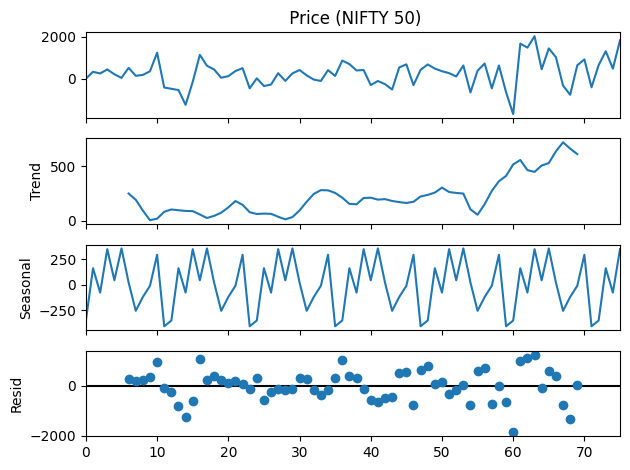

No seasonality detected in  Price (NIFTY 50).
Log transformation applied to  Price (NIFTY 50).
Data is now stationary (p-value: 2.0520887520396335e-09) after log transformation.
(76, 21)
Processing for: Method 1
 Price (NIFTY 50) is non-stationary (p-value: 1.0), performing differencing.
Data is now stationary (p-value: 1.2081697133414248e-08) after differencing.


/usr/local/lib/python3.11/dist-packages/pandas/core/arraylike.py:399: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


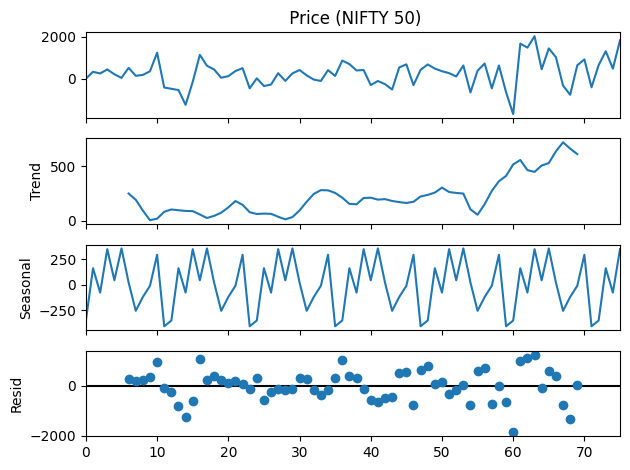

No seasonality detected in  Price (NIFTY 50).
Log transformation applied to  Price (NIFTY 50).
Data is now stationary (p-value: 2.0520887520396335e-09) after log transformation.
(76, 21)


/usr/local/lib/python3.11/dist-packages/pandas/core/arraylike.py:399: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [30]:
def preprocess_time_series(df, target_col, feature_cols, dataset_name):
    print(f"Processing for: {dataset_name}")
    # Select only the target column and the specified feature columns
    df = df[[target_col] + feature_cols]

    def adf_test(series):
        result = adfuller(series)
        return result[1]

    p_value = adf_test(df[target_col])
    if p_value > 0.05:
        print(f"{target_col} is non-stationary (p-value: {p_value}), performing differencing.")
        df[target_col] = df[target_col].diff()
        df[target_col] = df[target_col].fillna(0)
        if df[target_col].isnull().any() or np.isinf(df[target_col]).any():
            print(f"Warning: NaN or Inf values still present in {target_col} after differencing.")
            df[target_col] = df[target_col].fillna(0)
        p_value = adf_test(df[target_col])
        if p_value <= 0.05:
            print(f"Data is now stationary (p-value: {p_value}) after differencing.")
        else:
            print(f"Data is still non-stationary (p-value: {p_value}) after differencing.")
    else:
        print(f"{target_col} is already stationary (p-value: {p_value}).")

    decomposition = seasonal_decompose(df[target_col].dropna(), model='additive', period=12)
    decomposition.plot()
    plt.show()
    seasonal_p_value = adf_test(decomposition.seasonal.dropna())
    if seasonal_p_value > 0.05:
        print(f"Seasonality detected, removing seasonality from {target_col}.")
        df[target_col] = df[target_col] - decomposition.seasonal
        df[target_col] = df[target_col].fillna(0)
        if df[target_col].isnull().any() or np.isinf(df[target_col]).any():
            print(f"Warning: NaN or Inf values still present in {target_col} after seasonal adjustment.")
            df[target_col] = df[target_col].fillna(0)  # Ensure no NaNs remain
        seasonal_p_value = adf_test(df[target_col])
        if seasonal_p_value <= 0.05:
            print(f"Data is now stationary (p-value: {seasonal_p_value}) after removing seasonality.")
        else:
            print(f"Data is still non-stationary (p-value: {seasonal_p_value}) after removing seasonality.")
    else:
        print(f"No seasonality detected in {target_col}.")
    if np.any(df[target_col] <= 0):
        print(f"Log transformation applied to {target_col}.")
        df[target_col] = np.log(df[target_col] + 1)
        if df[target_col].isnull().any() or np.isinf(df[target_col]).any():
            print(f"Warning: NaN or Inf values still present in {target_col} after log transformation.")
            df[target_col] = df[target_col].fillna(0)
        p_value = adf_test(df[target_col])
        if p_value <= 0.05:
            print(f"Data is now stationary (p-value: {p_value}) after log transformation.")
        else:
            print(f"Data is still non-stationary (p-value: {p_value}) after log transformation.")

    scaler = StandardScaler()
    df[feature_cols] = scaler.fit_transform(df[feature_cols])
    print(df.shape)
    return df

# Separate the features out of the original dataframe
combined_features_set = comb_feat['Feature'].values.tolist()
top_20_features_set = top_20_features['Feature'].values.tolist()

# Subset the dataframe for each feature set before passing it to the preprocessing function
df_combined_features = df[[' Price (NIFTY 50)'] + combined_features_set]
df_top_20_features = df[[' Price (NIFTY 50)'] + top_20_features_set]

# Process the datasets
processed_combined = preprocess_time_series(df_combined_features, ' Price (NIFTY 50)', combined_features_set, "Method 2")
processed_top_20 = preprocess_time_series(df_top_20_features, ' Price (NIFTY 50)', top_20_features_set, "Method 1")


In [31]:
warnings.filterwarnings("ignore")

# Define TimeSeriesSplit with desired number of splits
ts_split = TimeSeriesSplit(n_splits=5)  # Adjust n_splits as needed

X_combined_cleaned = processed_combined[combined_features_set]
y_combined_cleaned = processed_combined[' Price (NIFTY 50)']
X_top_20_cleaned = processed_top_20[top_20_features_set]
y_top_20_cleaned = processed_top_20[' Price (NIFTY 50)']


X_train_comb_clean, X_test_comb_clean, y_train_comb_clean, y_test_comb_clean = train_test_split(X_combined_cleaned, y_combined_cleaned, test_size=0.2, random_state=42)
X_train_top20_clean, X_test_top20_clean, y_train_top20_clean, y_test_top20_clean = train_test_split(X_top_20_cleaned, y_top_20_cleaned, test_size=0.2, random_state=42)

rf_comb_clean = RandomForestRegressor(random_state=42).fit(X_train_comb_clean, y_train_comb_clean)
rf_top20_clean = RandomForestRegressor(random_state=42).fit(X_train_top20_clean, y_train_top20_clean)

mse_comb_clean = mean_squared_error(y_test_comb_clean, rf_comb_clean.predict(X_test_comb_clean))
mse_top20_clean = mean_squared_error(y_test_top20_clean, rf_top20_clean.predict(X_test_top20_clean))

print("MSE (Cleaned Combined Features):", mse_comb_clean)
print("MSE (Cleaned Top 20 Features):", mse_top20_clean)

cv_comb_clean = cross_val_score(rf_comb_clean, X_combined_cleaned, y_combined_cleaned, cv=5, scoring='r2')
cv_top20_clean = cross_val_score(rf_top20_clean, X_top_20_cleaned, y_top_20_cleaned, cv=5, scoring='r2')

print("CV R² (Cleaned Combined Features):", cv_comb_clean.mean())
print("CV R² (Cleaned Top 20 Features):", cv_top20_clean.mean())

lasso_comb_clean = LassoCV(cv=5, random_state=42).fit(X_combined_cleaned, y_combined_cleaned)
lasso_top20_clean = LassoCV(cv=5, random_state=42).fit(X_top_20_cleaned, y_top_20_cleaned)

print("Lasso Selected Features (Cleaned Combined):", list(X_combined_cleaned.columns[lasso_comb_clean.coef_ != 0]))
print("Lasso Selected Features (Cleaned Top 20):", list(X_top_20_cleaned.columns[lasso_top20_clean.coef_ != 0]))

time_series_results_clean = {}

for feature_set_name, X_set in [("Cleaned Combined", X_combined_cleaned), ("Cleaned Top 20", X_top_20_cleaned)]:
    errors = []
    for train_idx, test_idx in ts_split.split(X_set):
        X_train, X_test = X_set.iloc[train_idx], X_set.iloc[test_idx]
        y_train, y_test = y_combined_cleaned.iloc[train_idx], y_combined_cleaned.iloc[test_idx]
        model = SARIMAX(y_train, exog=X_train, order=(1, 1, 0))
        results = model.fit(disp=False)
        forecast = results.predict(start=len(y_train), end=len(y_train) + len(y_test) - 1, exog=X_test)
        error = mean_squared_error(y_test, forecast)
        errors.append(error)

    time_series_results_clean[feature_set_name] = np.mean(errors)

print("Time Series MSE (Cleaned Combined Features):", time_series_results_clean["Cleaned Combined"])
print("Time Series MSE (Cleaned Top 20 Features):", time_series_results_clean["Cleaned Top 20"])


MSE (Cleaned Combined Features): 6.010358311629976
MSE (Cleaned Top 20 Features): 6.268305472257953
CV R² (Cleaned Combined Features): 0.25580244921387274
CV R² (Cleaned Top 20 Features): 0.2498336244581824
Lasso Selected Features (Cleaned Combined): [' Vol.  (Gold Futures)', ' Change % (NIFTY 50)', ' Change % (USD to INR)', ' Low (EUR to INR)']
Lasso Selected Features (Cleaned Top 20): [' Vol.  (Gold Futures)', ' Change % (NIFTY 50)', ' Change % (USD to INR)']
Time Series MSE (Cleaned Combined Features): 61.00506421746277
Time Series MSE (Cleaned Top 20 Features): 133.2381144322672


## Result: Method 2 is marginally Better

### Note: A test was also done to check if removing outliers changed the results above. It was found that it did not change for method 2 but significatinly increased MSE for method 1, hence original is used.

# Pre-processing and Modelling

In [32]:
df2 = df[combined_features_set + [' Price (NIFTY 50)']]

In [33]:
df2

Change %  (Gold Futures)   Vol.  (Silver Futures)  \
0                      0.0002              9512.384942   
1                      0.0012              9544.512106   
2                      0.0016             10534.227100   
3                      0.0021            172278.659100   
4                      0.0010             17668.635250   
..                        ...                      ...   
71                     0.0013            195088.954300   
72                    -0.0004            103609.944000   
73                    -0.0006            105226.969100   
74                     0.0018             94973.250680   
75                     0.0012            207129.181000   

     Change % (WTI Oil Futures)  Export:Import Ratio   Change % (Bank Nifty)  \
0                        0.0006            64.970000                  0.0001   
1                        0.0027            65.950000                  0.0039   
2                       -0.0012            70.500000                 -0.0002   
3                        0.0016            76.790000                  0.0005   
4                        0.0018            68.670000                 -0.0033   
..                          ...                  ...                     ...   
71                      -0.0007            68.990000                 -0.0009   
72                      -0.0008            65.240000                  0.0016   
73                       0.0035            64.260000                  0.0000   
74                      -0.0030            66.163333                  0.0013   
75                       0.0023            66.163333                 -0.0003   

     Vol.  (Gold Futures)   Vol. (NIFTY 50)   Change % (NIFTY 50)  \
0                47905.47      5.560908e+07                0.0014   
1                55024.69      6.880032e+07                0.0026   
2                56741.77      7.841597e+07                0.0015   
3                66994.19      8.373508e+07                0.0030   
4                61106.83      1.027690e+08               -0.0010   
..                    ...               ...                   ...   
71               67628.59      2.777162e+08               -0.0007   
72              120581.41      2.556888e+08                0.0017   
73               23263.69      2.813119e+08                0.0004   
74              125761.41      2.425116e+08                0.0017   
75               70064.92      3.381382e+08                0.0005   

     Change %  (Silver Futures)   Change % (USD to INR)  ...  \
0                       -0.0002                 -0.0001  ...   
1                        0.0010                  0.0002  ...   
2                        0.0028                  0.0004  ...   
3                        0.0043                 -0.0002  ...   
4                        0.0002                  0.0005  ...   
..                          ...                     ...  ...   
71                       0.0004                 -0.0001  ...   
72                      -0.0003                  0.0000  ...   
73                      -0.0003                  0.0002  ...   
74                       0.0012                  0.0000  ...   
75                       0.0007                  0.0000  ...   

     Change % (EUR to INR)  Volume (NASDAQ)   Vol. (WTI Oil Futures)  \
0                  -0.0011       1694432188              99179.37500   
1                   0.0001       1589548438             102741.25000   
2                   0.0001       1693624762              91433.54839   
3                   0.0002       2039564839             108247.58060   
4                   0.0013       2040782063             108091.26980   
..                     ...              ...                      ...   
71                  0.0001       5269363387             171403.22580   
72                  0.0001       4829840968             174374.83870   
73                 -0.0003       4801046508             202764.60320   
74                  0.0007   

In [34]:
processed_combined

Price (NIFTY 50)   Change %  (Gold Futures)   Vol.  (Silver Futures)  \
0            0.000000                  -0.187238                -0.744413   
1            5.790724                   0.707737                -0.744278   
2            5.509307                   1.065728                -0.740097   
3            6.087979                   1.513216                -0.056804   
4            5.336384                   0.528742                -0.709957   
..                ...                        ...                      ...   
71           0.000000                   0.797235                 0.039558   
72           6.466098                  -0.724224                -0.346897   
73           7.180786                  -0.903219                -0.340065   
74           6.168418                   1.244723                -0.383382   
75           7.515116                   0.707737                 0.090422   

     Change % (WTI Oil Futures)  Export:Import Ratio   Change % (Bank Nifty)  \
0                      0.034676            -0.327494               -0.233299   
1                      0.636233            -0.156392                1.244260   
2                     -0.480944             0.638010               -0.349948   
3                      0.321132             1.736205               -0.077766   
4                      0.378423             0.318504               -1.555324   
..                          ...                  ...                     ...   
71                    -0.337716             0.374374               -0.622130   
72                    -0.366362            -0.280353                0.349948   
73                     0.865398            -0.451455               -0.272182   
74                    -0.996565            -0.119145                0.233299   
75                     0.521651            -0.119145               -0.388831   

     Vol.  (Gold Futures)   Vol. (NIFTY 50)   Change % (NIFTY 50)  \
0               -1.398758         -1.184733              0.473617   
1               -1.261304         -1.098806              1.184042   
2               -1.228151         -1.036171              0.532819   
3               -1.030203         -1.001523              1.420850   
4               -1.143873         -0.877538             -0.947234   
..                    ...               ...                   ...   
71              -1.017954          0.262049             -0.769627   
72               0.004430          0.118565              0.651223   
73              -1.874528          0.285471             -0.118404   
74               0.104443          0.032730              0.651223   
75              -0.970915          0.655631             -0.059202   

     Change %  (Silver Futures)  ...   Low (WTI Oil Futures)  \
0                     -0.321220  ...               -0.893778   
1                      0.250953  ...               -0.414823   
2                      1.109214  ...               -0.561837   
3                      1.824432  ...               -0.396205   
4                     -0.130496  ...               -0.050166   
..                          ...  ...                     ...   
71                    -0.035133  ...                0.206739   
72                    -0.368902  ...                0.075462   
73                    -0.368902  ...                0.471491   
74                     0.346316  ...                0.303449   
75                     0.107910  ...                0.225777   

     Change % (EUR to INR)  Volume (NASDAQ)   Vol. (WTI Oil Futures)  \
0                -1.908056        -0.750858                -1.633971   
1                -0.014534        -0.835830                -1.597897   
2                -0.014534        -0.751512                -1.712419   
3                 0.143260        -0.471248                -1.542130   
4                 1.878989        -0.470261                -1.543713   
..                     ...              ...                      ...   
71               

In [35]:
target_col = ' Price (NIFTY 50)'
max_lag = 1  # You can adjust this based on your data

# Store results for Granger causality tests
granger_results = {}

# Loop through all columns in df2 except the target column
for col in processed_combined.columns:
    if col != target_col:  # Avoid testing the target column with itself
        # Perform Granger Causality Test
        try:
            test_result = grangercausalitytests(processed_combined[[target_col, col]], max_lag, verbose=False)
            # Extract p-values for each lag (if p-value < 0.05, it's considered Granger causality)
            p_values = {lag: test_result[lag][0]['ssr_chi2test'][1] for lag in range(1, max_lag + 1)}
            granger_results[(target_col, col)] = p_values
        except Exception as e:
            print(f"Error testing Granger causality for {target_col} and {col}: {e}")

# Print the results
for (target_col, col), p_values in granger_results.items():
    print(f"Granger Causality test results between {target_col} and {col}:")
    for lag, p_value in p_values.items():
        print(f"  Lag {lag}: p-value = {p_value}")
    print("\n")

# Check if any causality was found
causality_found = False
for (target_col, col), p_values in granger_results.items():
    for p_value in p_values.values():
        if p_value < 0.05:
            causality_found = True
            print(f"\nGranger causality found between {target_col} and {col} at some lag.")

if not causality_found:
    print("\nNo significant Granger causality found between Price (NIFTY 50) and any other variable.")


Granger Causality test results between  Price (NIFTY 50) and  Change %  (Gold Futures):
  Lag 1: p-value = 0.6478446199043121


Granger Causality test results between  Price (NIFTY 50) and  Vol.  (Silver Futures):
  Lag 1: p-value = 0.20485823219525118


Granger Causality test results between  Price (NIFTY 50) and  Change % (WTI Oil Futures):
  Lag 1: p-value = 0.11072644930437354


Granger Causality test results between  Price (NIFTY 50) and Export:Import Ratio:
  Lag 1: p-value = 0.020553965501942138


Granger Causality test results between  Price (NIFTY 50) and  Change % (Bank Nifty):
  Lag 1: p-value = 0.013232317544877647


Granger Causality test results between  Price (NIFTY 50) and  Vol.  (Gold Futures):
  Lag 1: p-value = 0.023987176456919605


Granger Causality test results between  Price (NIFTY 50) and  Vol. (NIFTY 50):
  Lag 1: p-value = 0.37037557938128096


Granger Causality test results between  Price (NIFTY 50) and  Change % (NIFTY 50):
  Lag 1: p-value = 0.0001201996700

In [36]:
granger_data_lag1 = [
    {"Variable": "Export:Import Ratio", "p-value": 0.02055396550194231},
    {"Variable": "Change % (Bank Nifty)", "p-value": 0.013232317544877897},
    {"Variable": "Vol. (Gold Futures)", "p-value": 0.02398717645691986},
    {"Variable": "Change % (NIFTY 50)", "p-value": 0.0001201996700976625}
]


granger_df_lag1 = pd.DataFrame(granger_data_lag1)
significant_granger_df_lag1 = granger_df_lag1[granger_df_lag1['p-value'] < 0.05]

print("Significant Granger Causality Results for Lag 1:")
print(significant_granger_df_lag1)

causal_variables_lag1 = [
    'Export:Import Ratio', ' Change % (NIFTY 50)', ' Change % (Bank Nifty)',
    ' Vol.  (Gold Futures)'
]

df3= df2[[' Price (NIFTY 50)'] + causal_variables_lag1]
df3.head()
processed_granger= processed_combined[[' Price (NIFTY 50)'] + causal_variables_lag1]

Significant Granger Causality Results for Lag 1:
                Variable   p-value
0    Export:Import Ratio  0.020554
1  Change % (Bank Nifty)  0.013232
2    Vol. (Gold Futures)  0.023987
3    Change % (NIFTY 50)  0.000120


<Figure size 1200x600 with 0 Axes>

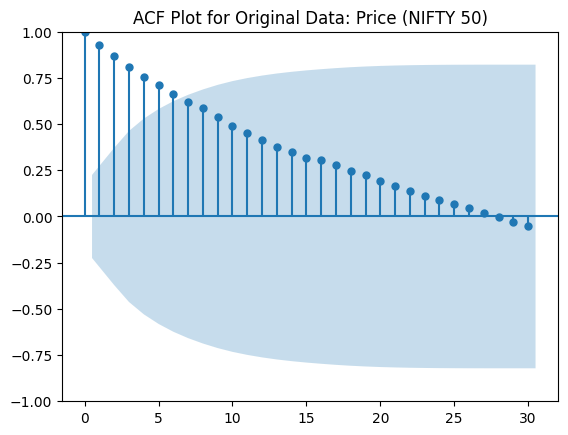

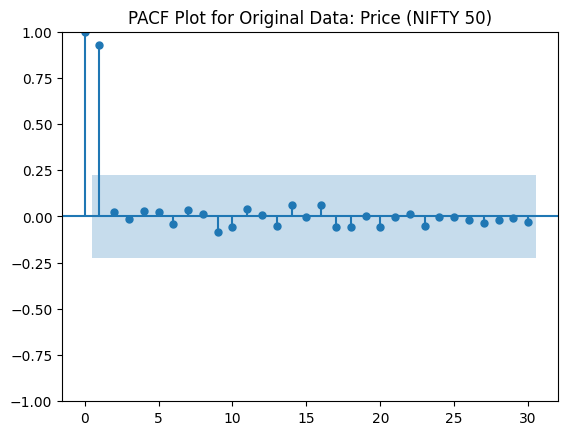

In [37]:
plt.figure(figsize=(12, 6))
plot_acf(df2[' Price (NIFTY 50)'], lags=30, title="ACF Plot for Original Data: Price (NIFTY 50)")
plot_pacf(df2[' Price (NIFTY 50)'], lags=30, title="PACF Plot for Original Data: Price (NIFTY 50)")
plt.show()

<Figure size 1200x600 with 0 Axes>

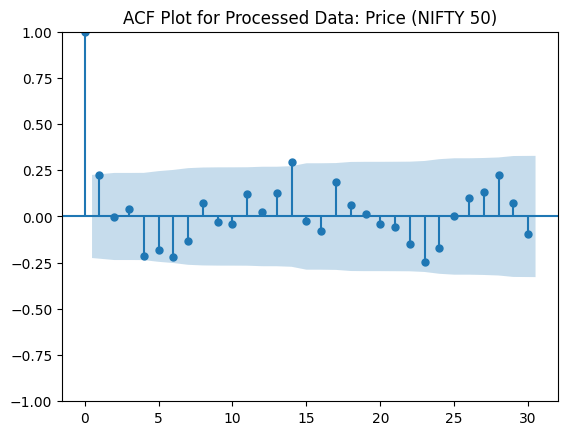

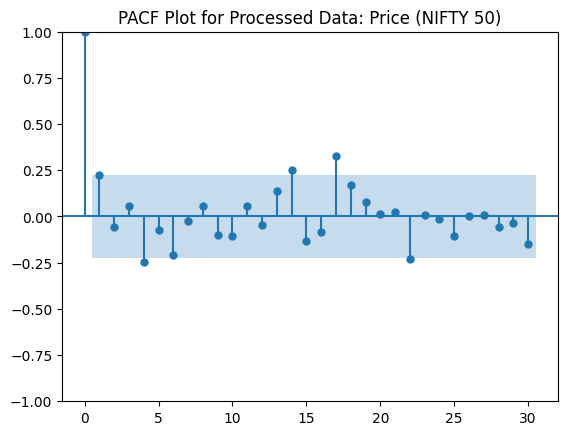

In [38]:
plt.figure(figsize=(12, 6))
plot_acf(processed_combined[' Price (NIFTY 50)'], lags=30, title="ACF Plot for Processed Data: Price (NIFTY 50)")
plot_pacf(processed_combined[' Price (NIFTY 50)'], lags=30, title="PACF Plot for Processed Data: Price (NIFTY 50)")
plt.show()

In [39]:
# Compute FFT
fft_vals = np.fft.fft(processed_combined[' Price (NIFTY 50)'])
fft_freqs = np.fft.fftfreq(len(fft_vals))

# Identify the dominant frequency
dominant_freq = abs(fft_freqs[np.argmax(abs(fft_vals[1:])) + 1])
seasonal_period = 1 / dominant_freq

print(f"Dominant seasonal period: {seasonal_period}")


Dominant seasonal period: 15.200000000000001


In [40]:
# Add a constant to the independent variables for VIF calculation
X = add_constant(processed_combined)
X = X.drop(columns=[' Price (NIFTY 50)'])
# Calculate VIF for each variable
vif_data = pd.DataFrame()
vif_data['Variable'] = X.columns
vif_data['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

# Display VIF results
print(vif_data)


                       Variable           VIF
0                         const      1.000000
1      Change %  (Gold Futures)      2.708539
2        Vol.  (Silver Futures)      3.459468
3    Change % (WTI Oil Futures)      2.415800
4           Export:Import Ratio      2.616513
5         Change % (Bank Nifty)      8.979935
6          Vol.  (Gold Futures)      2.636710
7               Vol. (NIFTY 50)      4.040937
8           Change % (NIFTY 50)     10.115542
9    Change %  (Silver Futures)      3.869056
10        Change % (USD to INR)      2.992181
11        Low (WTI Oil Futures)   2117.210079
12        Change % (EUR to INR)      1.474953
13              Volume (NASDAQ)      4.897809
14       Vol. (WTI Oil Futures)      3.510472
15       High (WTI Oil Futures)   2101.251987
16        Low  (Silver Futures)  11530.486169
17             Low (EUR to INR)      8.587125
18       High  (Silver Futures)  11235.349237
19         High  (Gold Futures)  32797.942074
20          Low  (Gold Futures)  3

In [41]:
variables_to_remove = [
     ' High (WTI Oil Futures)',
    ' High  (Gold Futures)' ,
    ' Low  (Gold Futures)'
]

df2_clean = df2.drop(columns=variables_to_remove)
df2_clean
processed_clean = processed_combined.drop(columns=variables_to_remove)

In [42]:
X = add_constant(processed_clean)
X = X.drop(columns=[' Price (NIFTY 50)'])
# Calculate VIF for each variable
vif_data = pd.DataFrame()
vif_data['Variable'] = X.columns
vif_data['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

# Display VIF results
print(vif_data)


                       Variable          VIF
0                         const     1.000000
1      Change %  (Gold Futures)     2.639858
2        Vol.  (Silver Futures)     2.081754
3    Change % (WTI Oil Futures)     2.215089
4           Export:Import Ratio     2.023966
5         Change % (Bank Nifty)     8.152142
6          Vol.  (Gold Futures)     2.591088
7               Vol. (NIFTY 50)     3.070668
8           Change % (NIFTY 50)     9.213227
9    Change %  (Silver Futures)     3.475639
10        Change % (USD to INR)     2.539759
11        Low (WTI Oil Futures)     2.853741
12        Change % (EUR to INR)     1.389902
13              Volume (NASDAQ)     3.001117
14       Vol. (WTI Oil Futures)     3.012628
15        Low  (Silver Futures)  2452.768400
16             Low (EUR to INR)     4.502984
17       High  (Silver Futures)  2452.291981


In [43]:
processed_clean

Price (NIFTY 50)   Change %  (Gold Futures)   Vol.  (Silver Futures)  \
0            0.000000                  -0.187238                -0.744413   
1            5.790724                   0.707737                -0.744278   
2            5.509307                   1.065728                -0.740097   
3            6.087979                   1.513216                -0.056804   
4            5.336384                   0.528742                -0.709957   
..                ...                        ...                      ...   
71           0.000000                   0.797235                 0.039558   
72           6.466098                  -0.724224                -0.346897   
73           7.180786                  -0.903219                -0.340065   
74           6.168418                   1.244723                -0.383382   
75           7.515116                   0.707737                 0.090422   

     Change % (WTI Oil Futures)  Export:Import Ratio   Change % (Bank Nifty)  \
0                      0.034676            -0.327494               -0.233299   
1                      0.636233            -0.156392                1.244260   
2                     -0.480944             0.638010               -0.349948   
3                      0.321132             1.736205               -0.077766   
4                      0.378423             0.318504               -1.555324   
..                          ...                  ...                     ...   
71                    -0.337716             0.374374               -0.622130   
72                    -0.366362            -0.280353                0.349948   
73                     0.865398            -0.451455               -0.272182   
74                    -0.996565            -0.119145                0.233299   
75                     0.521651            -0.119145               -0.388831   

     Vol.  (Gold Futures)   Vol. (NIFTY 50)   Change % (NIFTY 50)  \
0               -1.398758         -1.184733              0.473617   
1               -1.261304         -1.098806              1.184042   
2               -1.228151         -1.036171              0.532819   
3               -1.030203         -1.001523              1.420850   
4               -1.143873         -0.877538             -0.947234   
..                    ...               ...                   ...   
71              -1.017954          0.262049             -0.769627   
72               0.004430          0.118565              0.651223   
73              -1.874528          0.285471             -0.118404   
74               0.104443          0.032730              0.651223   
75              -0.970915          0.655631             -0.059202   

     Change %  (Silver Futures)   Change % (USD to INR)  \
0                     -0.321220               -0.456300   
1                      0.250953                0.112205   
2                      1.109214                0.491208   
3                      1.824432               -0.645801   
4                     -0.130496                0.680709   
..                          ...                     ...   
71                    -0.035133               -0.456300   
72                    -0.368902               -0.266798   
73                    -0.368902                0.112205   
74                     0.346316               -0.266798   
75                     0.107910               -0.266798   

     Low (WTI Oil Futures)   Change % (EUR to INR)  Volume (NASDAQ)  \
0                -0.893778               -1.908056        -0.750858   
1                -0.414823               -0.014534        -0.835830   
2                -0.561837               -0.014534        -0.751512   
3                -0.396205                0.143260        -0.471248   
4                -0.050166                1.878989        -0.470261   
..                     ...                     ...              ...   
71                0.206739               -0.014534         2.145386   
72           

In [44]:
#Impact Analysis Variables
df3.columns.tolist()

[' Price (NIFTY 50)',
 'Export:Import Ratio',
 ' Change % (NIFTY 50)',
 ' Change % (Bank Nifty)',
 ' Vol.  (Gold Futures)']

### All Relevant Datasets Till Now:
1) df2 = Original Data of selected features
2) processed_combined = Processed data of selected features (Transformation Done: Differencing - Log transformation - Differencing)
3) df3 = Granger Causing Variables for Price NIFTY 50 (Highest impact as per granger causality on Price NIFTY 50)
4) processed_clean = multicollinearity and autocorrelation checked dataset from processed_combined (ready for modelling)

In [45]:
# Hyperparameter grids
param_grids = {
    'Linear Regression': {},
    'Lasso': {'alpha': [0.01, 0.1, 1, 10, 100]},
    'Ridge': {'alpha': [0.01, 0.1, 1, 10, 100]},
    'Elastic Net': {
        'alpha': [0.01, 0.1, 1, 10, 100],
        'l1_ratio': [0.1, 0.5, 0.7, 1]
    },
    'Polynomial Regression': {
        'polynomialfeatures__degree': [1, 2, 3, 4],
        'linearregression__fit_intercept': [True, False]
    },
    'SVR': {
        'C': [0.1, 1, 10, 100],
        'epsilon': [0.01, 0.1, 0.2],
        'kernel': ['linear', 'poly', 'rbf']
    },
    'Random Forest': {
        'n_estimators': [50, 100, 200],
        'max_depth': [5, 10, 20, None],
        'min_samples_split': [2, 5, 10],
        'min_samples_leaf': [1, 2, 4],
        'bootstrap': [True, False]
    },
    'Decision Tree': {
        'max_depth': [5, 10, 20, None],
        'min_samples_split': [2, 5, 10],
        'min_samples_leaf': [1, 2, 4],
        'criterion': ['squared_error', 'friedman_mse', 'absolute_error']
    },
    'XGBoost': {
        'n_estimators': [100, 200, 300],
        'learning_rate': [0.01, 0.1, 0.2],
        'max_depth': [3, 5, 7],
        'subsample': [0.8, 1.0],
        'colsample_bytree': [0.8, 1.0],
        'gamma': [0, 0.1, 0.2],
        'reg_alpha': [0, 0.01, 0.1],
        'reg_lambda': [1, 0.5, 1.5]
    },
    'KNN': {
        'n_neighbors': [3, 5, 10, 15],
        'weights': ['uniform', 'distance'],
        'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute']
    },
    'Bagging Regressor': {
        'n_estimators': [50, 100, 200],
        'max_samples': [0.5, 0.8, 1.0],
        'max_features': [0.5, 0.8, 1.0],
        'bootstrap': [True, False]
    },
    'AdaBoost Regressor': {
        'n_estimators': [50, 100, 200],
        'learning_rate': [0.01, 0.1, 0.5, 1]
    },
    'Gradient Boosting': {
        'n_estimators': [100, 200],
        'learning_rate': [0.01, 0.1, 0.2],
        'max_depth': [3, 5, 7],
        'subsample': [0.8, 1.0]
    },
    'RANSAC Regressor': {
        'min_samples': [0.5, 0.8, 1.0],
        'residual_threshold': [5.0, 10.0, 15.0],
        'max_trials': [100, 200]
    }
}

# Adjust RANSAC Regressor dynamically based on data range
def tune_models(processed_clean, target_col):
    X = processed_clean.drop(columns=[target_col])
    y = processed_clean[target_col]

    models = {
        'Linear Regression': LinearRegression(),
        'Lasso': Lasso(),
        'Ridge': Ridge(),
        'Elastic Net': ElasticNet(),
        'Polynomial Regression': make_pipeline(PolynomialFeatures(), LinearRegression()),
        'SVR': SVR(),
        'Random Forest': RandomForestRegressor(),
        'Decision Tree': DecisionTreeRegressor(),
        'XGBoost': XGBRegressor(use_label_encoder=False, objective='reg:squarederror'),
        'KNN': KNeighborsRegressor(),
        'Bagging Regressor': BaggingRegressor(),
        'AdaBoost Regressor': AdaBoostRegressor(),
        'Gradient Boosting': GradientBoostingRegressor(),
        'RANSAC Regressor': RANSACRegressor(residual_threshold=np.std(y) * 0.5)
    }

    best_models = {}

    for name, model in models.items():
        print(f"Tuning {name}...")
        try:
            param_grid = param_grids[name]
            if param_grid:
                kf = KFold(n_splits=5, shuffle=True, random_state=42)
                grid_search = GridSearchCV(
                    estimator=model,
                    param_grid=param_grid,
                    cv=kf,
                    scoring='r2',
                    n_jobs=-1,
                    error_score='raise'
                )
                grid_search.fit(X, y)
                best_models[name] = grid_search.best_estimator_
                print(f"Best parameters for {name}: {grid_search.best_params_}")
            else:
                model.fit(X, y)
                best_models[name] = model
                print(f"No hyperparameters to tune for {name}")
        except Exception as e:
            print(f"Error tuning {name}: {e}")

    return best_models
best_models = tune_models(processed_clean, target_col=' Price (NIFTY 50)')

Tuning Linear Regression...
No hyperparameters to tune for Linear Regression
Tuning Lasso...
Best parameters for Lasso: {'alpha': 1}
Tuning Ridge...
Best parameters for Ridge: {'alpha': 100}
Tuning Elastic Net...
Best parameters for Elastic Net: {'alpha': 1, 'l1_ratio': 0.5}
Tuning Polynomial Regression...
Best parameters for Polynomial Regression: {'linearregression__fit_intercept': False, 'polynomialfeatures__degree': 1}
Tuning SVR...
Best parameters for SVR: {'C': 10, 'epsilon': 0.2, 'kernel': 'rbf'}
Tuning Random Forest...
Best parameters for Random Forest: {'bootstrap': True, 'max_depth': 5, 'min_samples_leaf': 4, 'min_samples_split': 10, 'n_estimators': 50}
Tuning Decision Tree...
Best parameters for Decision Tree: {'criterion': 'absolute_error', 'max_depth': None, 'min_samples_leaf': 4, 'min_samples_split': 5}
Tuning XGBoost...
Best parameters for XGBoost: {'colsample_bytree': 1.0, 'gamma': 0.2, 'learning_rate': 0.2, 'max_depth': 5, 'n_estimators': 200, 'reg_alpha': 0.01, 'reg_l

In [46]:
# Hyperparameters after tuning
best_hyperparameters = {
    'Linear Regression': {},
    'Lasso': {'alpha': 1},
    'Ridge': {'alpha': 100},
    'Elastic Net': {'alpha': 1, 'l1_ratio': 0.5},
    'Polynomial Regression': {'linearregression__fit_intercept': True, 'polynomialfeatures__degree': 1},
    'SVR': {'C': 10, 'epsilon': 0.2, 'kernel': 'rbf'},
    'Random Forest': {'bootstrap': True, 'max_depth': None, 'min_samples_leaf': 4, 'min_samples_split': 5, 'n_estimators': 100},
    'Decision Tree': {'criterion': 'absolute_error', 'max_depth': 5, 'min_samples_leaf': 4, 'min_samples_split': 2},
    'XGBoost': {'colsample_bytree': 1.0, 'gamma': 0, 'learning_rate': 0.2, 'max_depth': 5, 'n_estimators': 300, 'reg_alpha': 0, 'reg_lambda': 1, 'subsample': 0.8},
    'KNN': {'algorithm': 'auto', 'n_neighbors': 15, 'weights': 'distance'},
    'Bagging Regressor': {'bootstrap': False, 'max_features': 1.0, 'max_samples': 0.5, 'n_estimators': 100},
    'AdaBoost Regressor': {'learning_rate': 0.01, 'n_estimators': 100},
    'Gradient Boosting':{'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 200, 'subsample': 0.8},
    'RANSAC Regressor': {'max_trials': 100, 'min_samples': 0.8, 'residual_threshold': 5.0}
}

# Function to evaluate models and save them
def evaluate_and_save_models(processed_clean, target_col):
    # Selecting features and target from the processed_clean dataset
    X = processed_clean.drop(columns=[target_col])
    y = processed_clean[target_col]

    # Define models that require hyperparameters from best_hyperparameters
    model_classes = {
        'Linear Regression': LinearRegression,
        'Lasso': Lasso,
        'Ridge': Ridge,
        'Elastic Net': ElasticNet,
        'Polynomial Regression': make_pipeline(PolynomialFeatures(degree=2), LinearRegression()),
        'SVR': SVR,
        'Random Forest': RandomForestRegressor,
        'Decision Tree': DecisionTreeRegressor,
        'XGBoost': XGBRegressor,
        'KNN': KNeighborsRegressor,
        'Bagging Regressor': BaggingRegressor,
        'AdaBoost Regressor': AdaBoostRegressor,
        'Gradient Boosting': GradientBoostingRegressor,
        'RANSAC Regressor': RANSACRegressor
    }

    # Initialize models with the corresponding hyperparameters
    models = {}

    for model_name, model_class in model_classes.items():
        if model_name == 'Polynomial Regression':
            # Handle Polynomial Regression separately as it has a pipeline
            models[model_name] = make_pipeline(
                PolynomialFeatures(degree=best_hyperparameters['Polynomial Regression']['polynomialfeatures__degree']),
                LinearRegression(fit_intercept=best_hyperparameters['Polynomial Regression']['linearregression__fit_intercept'])
            )
        elif model_name == 'KNN':
            # Initialize KNN with n_jobs=1 to limit parallelism
            models[model_name] = model_class(n_jobs=1, **best_hyperparameters.get(model_name, {}))
        else:
            # Initialize other models with hyperparameters using ** unpacking
            models[model_name] = model_class(**best_hyperparameters.get(model_name, {}))

    # Evaluate models
    results = []
    accuracy_matrix = []
    trained_models = {}

    for name, model in models.items():
        # Split data into training and test sets
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

        # Train the model
        model.fit(X_train, y_train)

        # Predict on both training and test sets
        y_train_pred = model.predict(X_train)
        y_test_pred = model.predict(X_test)

        # Calculate metrics for training and test sets
        train_rmse = np.sqrt(mean_squared_error(y_train, y_train_pred))
        train_mse = mean_squared_error(y_train, y_train_pred)
        train_mae = mean_absolute_error(y_train, y_train_pred)

        test_rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))
        test_mse = mean_squared_error(y_test, y_test_pred)
        test_mae = mean_absolute_error(y_test, y_test_pred)

        r2 = r2_score(y_test, y_test_pred)
        adj_r2 = 1 - (1 - r2) * (len(y_test) - 1) / (len(y_test) - X_test.shape[1] - 1)

        # Append results to main evaluation DataFrame
        results.append({
            'Model': name,
            'Test RMSE': test_rmse,
            'Test MSE': test_mse,
            'Test MAE': test_mae,
            'R²': r2,
            'Adjusted R²': adj_r2
        })

        # Append accuracy metrics
        accuracy_matrix.append({
            'Model': name,
            'Train RMSE': train_rmse,
            'Train MSE': train_mse,
            'Train MAE': train_mae,
            'Test RMSE': test_rmse,
            'Test MSE': test_mse,
            'Test MAE': test_mae
        })

        # Store the trained model in the dictionary
        trained_models[name] = model

    # Convert results into DataFrames
    results_df = pd.DataFrame(results)
    accuracy_matrix_df = pd.DataFrame(accuracy_matrix)

    # Sort by RMSE, then by MAE, then by R² (higher is better for R²)
    results_df = results_df.sort_values(by=['Test RMSE', 'Test MSE', 'Test MAE', 'R²'], ascending=[True, True, True, False])

    # Composite score for ranking models: lower RMSE, MSE, MAE is better, higher R² is better
    results_df['Composite Score'] = (results_df['Test RMSE'] + results_df['Test MSE'] + results_df['Test MAE'] - results_df['R²']) / 4

    # Rank models based on composite score (lower is better)
    results_df['Rank'] = results_df['Composite Score'].rank()
    results_df = results_df.sort_values(by='Rank', ascending=True)

    # Reset index for clean display
    results_df.reset_index(drop=True, inplace=True)

    # Return evaluation results, accuracy matrix, and trained models
    return results_df, accuracy_matrix_df, trained_models

In [47]:
results_reg_df, accuracy_reg_df, trained_models = evaluate_and_save_models(df2_clean, target_col=' Price (NIFTY 50)')
print('For Orignal Data')
results_reg_df

For Orignal Data


Model    Test RMSE      Test MSE     Test MAE        R²  \
0       Bagging Regressor  1626.561214  2.645701e+06  1285.557506  0.889030   
1           Random Forest  1674.385833  2.803568e+06  1231.096376  0.882408   
2           Decision Tree  1737.781854  3.019886e+06  1009.727188  0.873335   
3      AdaBoost Regressor  1786.717978  3.192361e+06  1181.571539  0.866101   
4                 XGBoost  1913.400627  3.661102e+06  1268.028464  0.846440   
5       Gradient Boosting  1941.760975  3.770436e+06  1517.348202  0.841854   
6       Linear Regression  2011.146170  4.044709e+06  1466.719907  0.830350   
7   Polynomial Regression  2011.175305  4.044826e+06  1466.744211  0.830345   
8                     KNN  2043.435991  4.175631e+06  1626.036061  0.824859   
9                   Lasso  2226.403487  4.956872e+06  1474.024229  0.792091   
10                  Ridge  2414.758385  5.831058e+06  1600.036390  0.755424   
11            Elastic Net  2415.167342  5.833033e+06  1585.304709  0.755342   
12       RANSAC Regressor  4011.807646  1.609460e+07  3126.645391  0.324934   
13                    SVR  4960.465170  2.460621e+07  4016.980269 -0.032074   

    Adjusted R²  Composite Score  Rank  
0      1.832277     6.621532e+05   1.0  
1      1.881938     7.016181e+05   2.0  
2      1.949987     7.556581e+05   3.0  
3      2.004244     7.988321e+05   4.0  
4      2.151699     9.160706e+05   5.0  
5      2.186093     9.434735e+05   6.0  
6      2.272373     1.012046e+06   7.0  
7      2.272410     1.012076e+06   8.0  
8      2.313558     1.044825e+06   9.0  
9      2.559318     1.240143e+06  10.0  
10     2.834317     1.458768e+06  11.0  
11     2.834939     1.459258e+06  12.0  
12     6.062993     4.025435e+06  13.0  
13     8.740551     6.153798e+06  14.0

In [48]:
results_reg_df, accuracy_reg_df, trained_models = evaluate_and_save_models(processed_clean, target_col=' Price (NIFTY 50)')
print('For Processed Data')
results_reg_df

For Processed Data


Model  Test RMSE  Test MSE  Test MAE        R²  \
0                 XGBoost   2.152730  4.634248  1.444481  0.470105   
1           Decision Tree   2.243522  5.033391  1.236982  0.424466   
2       Bagging Regressor   2.344167  5.495117  1.693025  0.371671   
3       Gradient Boosting   2.357965  5.559998  1.823628  0.364252   
4           Random Forest   2.484090  6.170704  1.833528  0.294422   
5                     SVR   2.530742  6.404657  1.893133  0.267671   
6      AdaBoost Regressor   2.599622  6.758034  1.506203  0.227264   
7             Elastic Net   2.622667  6.878381  2.417566  0.213504   
8                     KNN   2.677856  7.170914  2.322345  0.180054   
9                   Ridge   2.718049  7.387791  2.493307  0.155256   
10                  Lasso   2.716626  7.380060  2.529377  0.156140   
11  Polynomial Regression   2.890964  8.357675  2.395270  0.044356   
12       RANSAC Regressor   2.890964  8.357675  2.395270  0.044356   
13      Linear Regression   2.890964  8.357675  2.395270  0.044356   

    Adjusted R²  Composite Score  Rank  
0      4.974212         1.940339   1.0  
1      5.316506         2.022357   2.0  
2      5.712471         2.290159   3.0  
3      5.768111         2.344335   4.0  
4      6.291837         2.548475   5.0  
5      6.492470         2.640215   6.0  
6      6.795516         2.659149   7.0  
7      6.898723         2.926278   8.0  
8      7.149592         2.997765   9.0  
9      7.335579         3.110973  10.0  
10     7.328949         3.117481  11.0  
11     8.167327         3.399888  12.0  
12     8.167327         3.399888  13.0  
13     8.167327         3.399888  14.0

### We Take processed data results table as we want more predictive power

In [49]:
best_hyperparameters = {
    'SARIMAX': {'order': (1, 0, 1), 'seasonal_order': (1, 0, 1, 15)},
    'GARCH': {'p': 1, 'q': 1},
    'ETS': {'trend': 'add', 'seasonal': 'add', 'seasonal_periods': 15},
    'ARIMA': {'order': (1, 0, 1)},
    'KDE': {'bandwidth': 0.1}
}

def evaluate_and_save_time_series_models(processed_clean, target_col, df):
    X = processed_clean.drop(columns=[target_col])
    y = processed_clean[target_col]

    # Initialize models with the corresponding hyperparameters
    models = {
        'SARIMAX': SARIMAX(y, order=best_hyperparameters['SARIMAX']['order'],
                           seasonal_order=best_hyperparameters['SARIMAX']['seasonal_order']),
        'GARCH': arch_model(y, vol='Garch', p=best_hyperparameters['GARCH']['p'], q=best_hyperparameters['GARCH']['q']),
        'ETS': ExponentialSmoothing(y, trend=best_hyperparameters['ETS']['trend'],
                                    seasonal=best_hyperparameters['ETS']['seasonal'],
                                    seasonal_periods=best_hyperparameters['ETS']['seasonal_periods']),
        'ARIMA': ARIMA(y, order=best_hyperparameters['ARIMA']['order']),
        'KDE': KernelDensity(bandwidth=best_hyperparameters['KDE']['bandwidth']),
    }

    # Evaluate models
    results = []
    accuracy_matrix = []
    trained_models = {}

    for name, model in models.items():
        # Split the data into training and test sets
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

        try:
            if name == 'SARIMAX':
                model_fit = model.fit(disp=False)
                train_pred = model_fit.predict(start=0, end=len(y_train) - 1)
                test_pred = model_fit.predict(start=len(y_train), end=len(y) - 1)
            elif name == 'GARCH':
                model_fit = model.fit()
                train_pred = model_fit.forecast(horizon=len(y_train)).mean.values.flatten()
                test_pred = model_fit.forecast(horizon=len(y_test)).mean.values.flatten()
            elif name == 'ETS':
                model_fit = model.fit()
                train_pred = model_fit.fittedvalues
                test_pred = model_fit.forecast(len(y_test))
            elif name == 'ARIMA':
                model_fit = model.fit()
                train_pred = model_fit.predict(start=0, end=len(y_train) - 1)
                test_pred = model_fit.predict(start=len(y_train), end=len(y) - 1)
            elif name == 'KDE':
                model_fit = model.fit(np.expand_dims(y_train.values, axis=1))
                train_pred = model_fit.sample(len(y_train)).flatten()
                test_pred = model_fit.sample(len(y_test)).flatten()
        except Exception as e:
            print(f"Error training {name}: {e}")
            continue

        # Trim predictions to match actual size
        train_pred = train_pred[:len(y_train)]
        test_pred = test_pred[:len(y_test)]

        # Calculate metrics for training and test sets
        train_rmse = np.sqrt(mean_squared_error(y_train, train_pred))
        train_mse = mean_squared_error(y_train, train_pred)
        train_mae = mean_absolute_error(y_train, train_pred)

        test_rmse = np.sqrt(mean_squared_error(y_test, test_pred))
        test_mse = mean_squared_error(y_test, test_pred)
        test_mae = mean_absolute_error(y_test, test_pred)

        r2 = r2_score(y_test, test_pred)
        adj_r2 = 1 - (1 - r2) * (len(y_test) - 1) / (len(y_test) - X_test.shape[1] - 1) if len(X_test.shape) > 1 else r2

        # Append results
        results.append({
            'Model': name,
            'Test RMSE': test_rmse,
            'Test MSE': test_mse,
            'Test MAE': test_mae,
            'R²': r2,
            'Adjusted R²': adj_r2
        })

        # Append accuracy matrix
        accuracy_matrix.append({
            'Model': name,
            'Train RMSE': train_rmse,
            'Train MSE': train_mse,
            'Train MAE': train_mae,
            'Test RMSE': test_rmse,
            'Test MSE': test_mse,
            'Test MAE': test_mae,
        })

        # Store trained model
        trained_models[name] = model_fit

    # Convert results and accuracy matrix into DataFrames
    results_df = pd.DataFrame(results)
    accuracy_matrix_df = pd.DataFrame(accuracy_matrix)

    # Sort and rank models
    results_df = results_df.sort_values(by=['Test RMSE', 'Test MSE', 'Test MAE', 'R²'], ascending=[True, True, True, False])
    results_df['Composite Score'] = (results_df['Test RMSE'] + results_df['Test MSE'] + results_df['Test MAE'] - results_df['R²']) / 4
    results_df['Rank'] = results_df['Composite Score'].rank()
    results_df.reset_index(drop=True, inplace=True)

    return results_df, accuracy_matrix_df, trained_models

In [50]:
results_time_df, accuracy_time_df, trained_models = evaluate_and_save_time_series_models(processed_clean, target_col=' Price (NIFTY 50)', df=df)
results_time_df

Iteration:      1,   Func. Count:      6,   Neg. LLF: 191.9870604457742
Iteration:      2,   Func. Count:     13,   Neg. LLF: 195.14496619304913
Iteration:      3,   Func. Count:     19,   Neg. LLF: 188.6570302719403
Iteration:      4,   Func. Count:     25,   Neg. LLF: 188.03450863426124
Iteration:      5,   Func. Count:     30,   Neg. LLF: 188.03337968223312
Iteration:      6,   Func. Count:     35,   Neg. LLF: 188.0317155275221
Iteration:      7,   Func. Count:     40,   Neg. LLF: 188.0310387303264
Iteration:      8,   Func. Count:     45,   Neg. LLF: 188.03093957017816
Iteration:      9,   Func. Count:     50,   Neg. LLF: 188.03093776103273
Iteration:     10,   Func. Count:     54,   Neg. LLF: 188.0309377610296
Optimization terminated successfully    (Exit mode 0)
            Current function value: 188.03093776103273
            Iterations: 10
            Function evaluations: 54
            Gradient evaluations: 10


Model  Test RMSE   Test MSE  Test MAE        R²  Adjusted R²  \
0  SARIMAX   2.942532   8.658496  2.766578  0.009959     8.425304   
1    GARCH   2.959012   8.755752  2.726799 -0.001161     8.508708   
2      ETS   3.318982  11.015642  2.576358 -0.259564    10.446732   
3    ARIMA   3.339964  11.155356  3.070077 -0.275540    10.566547   
4      KDE   4.127384  17.035298  3.037976 -0.947871    15.609034   

   Composite Score  Rank  
0         3.589412   1.0  
1         3.610681   2.0  
2         4.292637   3.0  
3         4.460234   4.0  
4         6.287132   5.0

In [51]:
def reshape_for_lstm(X):
    return np.reshape(X, (X.shape[0], X.shape[1], 1))

# Define model builders for each architecture
def build_lstm(hp):
    model = Sequential()
    model.add(LSTM(
        units=hp.Int('units', min_value=32, max_value=128, step=16),
        return_sequences=True,
        input_shape=(X_train.shape[1], 1)
    ))
    model.add(Dropout(hp.Float('dropout', min_value=0.1, max_value=0.5, step=0.1)))
    model.add(LSTM(
        units=hp.Int('units', min_value=32, max_value=128, step=16)
    ))
    model.add(Dropout(hp.Float('dropout', min_value=0.1, max_value=0.5, step=0.1)))
    model.add(Dense(1))
    model.compile(optimizer=Adam(learning_rate=hp.Choice('lr', values=[1e-3, 1e-4, 1e-5])), loss='mean_squared_error')
    return model

def build_bilstm(hp):
    model = Sequential()
    model.add(Bidirectional(LSTM(
        units=hp.Int('units', min_value=32, max_value=128, step=16),
        return_sequences=True
    ), input_shape=(X_train.shape[1], 1))
    )
    model.add(Dropout(hp.Float('dropout', min_value=0.1, max_value=0.5, step=0.1)))
    model.add(LSTM(
        units=hp.Int('units', min_value=32, max_value=128, step=16)
    ))
    model.add(Dropout(hp.Float('dropout', min_value=0.1, max_value=0.5, step=0.1)))
    model.add(Dense(1))
    model.compile(optimizer=Adam(learning_rate=hp.Choice('lr', values=[1e-3, 1e-4, 1e-5])), loss='mean_squared_error')
    return model

def build_gru(hp):
    model = Sequential()
    model.add(GRU(
        units=hp.Int('units', min_value=32, max_value=128, step=16),
        return_sequences=True,
        input_shape=(X_train.shape[1], 1)
    ))
    model.add(Dropout(hp.Float('dropout', min_value=0.1, max_value=0.5, step=0.1)))
    model.add(GRU(
        units=hp.Int('units', min_value=32, max_value=128, step=16)
    ))
    model.add(Dropout(hp.Float('dropout', min_value=0.1, max_value=0.5, step=0.1)))
    model.add(Dense(1))
    model.compile(optimizer=Adam(learning_rate=hp.Choice('lr', values=[1e-3, 1e-4, 1e-5])), loss='mean_squared_error')
    return model

def build_cnn(hp):
    model = Sequential()
    model.add(Conv1D(
        filters=hp.Int('filters', min_value=16, max_value=128, step=16),
        kernel_size=hp.Choice('kernel_size', values=[2, 3, 5]),
        activation='relu',
        input_shape=(X_train.shape[1], 1)
    ))
    model.add(MaxPooling1D(pool_size=2))
    model.add(Flatten())
    model.add(Dense(1))
    model.compile(optimizer=Adam(learning_rate=hp.Choice('lr', values=[1e-3, 1e-4, 1e-5])), loss='mean_squared_error')
    return model

# Run hyperparameter tuning

def tune_hyperparameters(processed_clean, target_col):
    global X_train

    X = processed_clean.drop(columns=[target_col])
    y = processed_clean[target_col]
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Reshape data for LSTM, BiLSTM, GRU, and CNN (3D)
    X_train = reshape_for_lstm(X_train)
    X_test = reshape_for_lstm(X_test)

    tuner_classes = {
        'LSTM': build_lstm,
        'BiLSTM': build_bilstm,
        'GRU': build_gru,
        'CNN': build_cnn
    }

    best_hyperparameters = {}

    for model_name, builder in tuner_classes.items():
        print(f"Tuning {model_name}...")
        tuner = kt.RandomSearch(
            builder,
            objective='val_loss',
            max_trials=10,
            executions_per_trial=1,
            directory='tuning_results',
            project_name=f'{model_name}_tuning'
        )

        tuner.search(X_train, y_train, validation_data=(X_test, y_test), epochs=10, batch_size=32, verbose=0)

        # Get the best hyperparameters
        best_hps = tuner.get_best_hyperparameters(num_trials=1)[0]
        best_hyperparameters[model_name] = best_hps.values

    return best_hyperparameters


In [52]:
tune_hyperparameters(processed_clean, ' Price (NIFTY 50)')

Tuning LSTM...
Tuning BiLSTM...
Tuning GRU...
Tuning CNN...


{'LSTM': {'units': 128, 'dropout': 0.30000000000000004, 'lr': 0.001},
 'BiLSTM': {'units': 112, 'dropout': 0.2, 'lr': 0.001},
 'GRU': {'units': 112, 'dropout': 0.4, 'lr': 0.001},
 'CNN': {'filters': 96, 'kernel_size': 5, 'lr': 0.001}}

In [53]:
# Hyperparameters after tuning for deep learning models
best_hyperparameters_deep = {
    'LSTM': {'units': 96, 'dropout': 0.4, 'lr': 0.001, 'epochs': 20, 'batch_size': 32},
    'BiLSTM': {'units': 128, 'dropout': 0.3, 'lr': 0.001, 'epochs': 20, 'batch_size': 32},
    'GRU': {'units': 80, 'dropout': 0.1, 'lr': 0.001, 'epochs': 20, 'batch_size': 32},
    'CNN': {'filters': 128, 'kernel_size': 2, 'lr': 0.001, 'epochs': 20, 'batch_size': 32},
    'RNN': {'units': 50, 'dropout': 0.2, 'lr': 0.001, 'epochs': 20, 'batch_size': 32}
}


# Function to reshape data for LSTM, BiLSTM, GRU, CNN, and RNN models
def reshape_for_lstm(X):
    return np.reshape(X, (X.shape[0], X.shape[1], 1))

def evaluate_deep_models(processed_clean, target_col):
    import numpy as np
    import pandas as pd
    from sklearn.model_selection import train_test_split
    from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
    from tensorflow.keras.models import Sequential
    from tensorflow.keras.layers import LSTM, GRU, Dense, Dropout, Conv1D, MaxPooling1D, Flatten, Bidirectional
    from tensorflow.keras.optimizers import Adam

    # Selecting features and target from the processed_clean dataset
    X = processed_clean.drop(columns=[target_col]).values
    y = processed_clean[target_col].values

    # Define models
    model_classes = {
        'LSTM': LSTM,
        'BiLSTM': lambda: Bidirectional(LSTM(best_hyperparameters_deep['BiLSTM']['units'], return_sequences=True)),
        'GRU': GRU,
        'CNN': Conv1D,
        'RNN': Sequential
    }

    # Initialize models with the corresponding hyperparameters
    models = {}

    for model_name in model_classes:
        if model_name in ['LSTM', 'GRU']:
            models[model_name] = Sequential([
                model_classes[model_name](units=best_hyperparameters_deep[model_name]['units'],
                                          input_shape=(X.shape[1], 1),
                                          return_sequences=True),
                Dropout(best_hyperparameters_deep[model_name]['dropout']),
                model_classes[model_name](units=best_hyperparameters_deep[model_name]['units']),
                Dropout(best_hyperparameters_deep[model_name]['dropout']),
                Dense(1)
            ])
        elif model_name == 'BiLSTM':
            models[model_name] = Sequential([
                model_classes[model_name](),
                Dropout(best_hyperparameters_deep[model_name]['dropout']),
                LSTM(best_hyperparameters_deep[model_name]['units']),
                Dropout(best_hyperparameters_deep[model_name]['dropout']),
                Dense(1)
            ])
        elif model_name == 'CNN':
            models[model_name] = Sequential([
                Conv1D(filters=best_hyperparameters_deep[model_name]['filters'],
                       kernel_size=best_hyperparameters_deep[model_name]['kernel_size'],
                       activation='relu', input_shape=(X.shape[1], 1)),
                MaxPooling1D(pool_size=2),
                Flatten(),
                Dense(1)
            ])
        else:  # RNN
            models[model_name] = Sequential([
                Dense(best_hyperparameters_deep[model_name]['units'], input_dim=X.shape[1]),
                Dropout(best_hyperparameters_deep[model_name]['dropout']),
                Dense(1)
            ])

        # Compile the model
        models[model_name].compile(optimizer=Adam(learning_rate=best_hyperparameters_deep[model_name]['lr']),
                                   loss='mean_squared_error',
                                   metrics=['mean_squared_error'])

    # Evaluate models
    results = []
    accuracy_matrix = []
    trained_models = {}

    for name, model in models.items():
        # Split data into training and test sets
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

        # Reshape data for LSTM, BiLSTM, GRU, and CNN (3D)
        X_train = reshape_for_lstm(X_train)
        X_test = reshape_for_lstm(X_test)

        # Train the model
        history = model.fit(X_train, y_train, epochs=best_hyperparameters_deep[name]['epochs'],
                            batch_size=best_hyperparameters_deep[name]['batch_size'], verbose=0,
                            validation_data=(X_test, y_test))

        # Save the trained model
        model.save(f"{name}_model.h5")

        # Predict on the test set
        y_pred = model.predict(X_test)

        # Calculate metrics
        rmse = np.sqrt(mean_squared_error(y_test, y_pred))
        mse = mean_squared_error(y_test, y_pred)
        mae = mean_absolute_error(y_test, y_pred)
        r2 = r2_score(y_test, y_pred)
        adj_r2 = 1 - (1 - r2) * (len(y_test) - 1) / (len(y_test) - X_test.shape[1] - 1)

        # Append the results
        results.append({
            'Model': name,
            'RMSE': rmse,
            'MSE': mse,
            'MAE': mae,
            'R²': r2,
            'Adjusted R²': adj_r2
        })

        # Append training and validation loss to accuracy matrix
        accuracy_matrix.append({
            'Model': name,
            'Train Loss (Final Epoch)': history.history['loss'][-1],
            'Val Loss (Final Epoch)': history.history['val_loss'][-1],
        })

        # Store the trained model in the dictionary
        trained_models[name] = model

    # Convert results and accuracy matrix into DataFrames
    results_df = pd.DataFrame(results)
    accuracy_matrix_df = pd.DataFrame(accuracy_matrix)

    # Sort results by RMSE, then by MAE, then by R² (higher is better for R²)
    results_df = results_df.sort_values(by=['RMSE', 'MSE', 'MAE', 'R²'], ascending=[True, True, True, False])

    # Composite score for ranking models
    results_df['Composite Score'] = (results_df['RMSE'] + results_df['MSE'] + results_df['MAE'] - results_df['R²']) / 4
    results_df['Rank'] = results_df['Composite Score'].rank()
    results_df = results_df.sort_values(by='Rank', ascending=True).reset_index(drop=True)

    return results_df, accuracy_matrix_df, trained_models


In [54]:
results_deep_df, accuracy_deep_df, trained_models = evaluate_deep_models(processed_clean, target_col=' Price (NIFTY 50)')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 311ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 480ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 396ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step


In [55]:
accuracy_deep_df

Model  Train Loss (Final Epoch)  Val Loss (Final Epoch)
0    LSTM                  8.383617                8.378987
1  BiLSTM                  8.239362                8.387667
2     GRU                  8.442666                8.841539
3     CNN                  9.925867                9.854481
4     RNN                 19.288656               24.686749

In [56]:
result_df = pd.concat([results_reg_df, results_time_df, results_deep_df], axis=0)
result_df.reset_index(drop=True, inplace=True)
result_df.columns

Index(['Model', 'Test RMSE', 'Test MSE', 'Test MAE', 'R²', 'Adjusted R²',
       'Composite Score', 'Rank', 'RMSE', 'MSE', 'MAE'],
      dtype='object')

In [57]:
result_df = result_df.sort_values(by='R²', ascending=False).reset_index(drop=True)
result_df

Model  Test RMSE   Test MSE  Test MAE        R²  \
0                 XGBoost   2.152730   4.634248  1.444481  0.470105   
1           Decision Tree   2.243522   5.033391  1.236982  0.424466   
2       Bagging Regressor   2.344167   5.495117  1.693025  0.371671   
3       Gradient Boosting   2.357965   5.559998  1.823628  0.364252   
4           Random Forest   2.484090   6.170704  1.833528  0.294422   
5                     SVR   2.530742   6.404657  1.893133  0.267671   
6      AdaBoost Regressor   2.599622   6.758034  1.506203  0.227264   
7             Elastic Net   2.622667   6.878381  2.417566  0.213504   
8                     KNN   2.677856   7.170914  2.322345  0.180054   
9                   Lasso   2.716626   7.380060  2.529377  0.156140   
10                  Ridge   2.718049   7.387791  2.493307  0.155256   
11  Polynomial Regression   2.890964   8.357675  2.395270  0.044356   
12       RANSAC Regressor   2.890964   8.357675  2.395270  0.044356   
13      Linear Regression   2.890964   8.357675  2.395270  0.044356   
14                   LSTM        NaN        NaN       NaN  0.041919   
15                 BiLSTM        NaN        NaN       NaN  0.040927   
16                SARIMAX   2.942532   8.658496  2.766578  0.009959   
17                  GARCH   2.959012   8.755752  2.726799 -0.001161   
18                    GRU        NaN        NaN       NaN -0.010970   
19                    CNN        NaN        NaN       NaN -0.126793   
20                    ETS   3.318982  11.015642  2.576358 -0.259564   
21                  ARIMA   3.339964  11.155356  3.070077 -0.275540   
22                    KDE   4.127384  17.035298  3.037976 -0.947871   
23                    RNN        NaN        NaN       NaN -1.822763   

    Adjusted R²  Composite Score  Rank      RMSE        MSE       MAE  
0      4.974212         1.940339   1.0       NaN        NaN       NaN  
1      5.316506         2.022357   2.0       NaN        NaN       NaN  
2      5.712471         2.290159   3.0       NaN        NaN       NaN  
3      5.768111         2.344335   4.0       NaN        NaN       NaN  
4      6.291837         2.548475   5.0       NaN        NaN       NaN  
5      6.492470         2.640215   6.0       NaN        NaN       NaN  
6      6.795516         2.659149   7.0       NaN        NaN       NaN  
7      6.898723         2.926278   8.0       NaN        NaN       NaN  
8      7.149592         2.997765   9.0       NaN        NaN       NaN  
9      7.328949         3.117481  11.0       NaN        NaN       NaN  
10     7.335579         3.110973  10.0       NaN        NaN       NaN  
11     8.167327         3.399888  12.0       NaN        NaN       NaN  
12     8.167327         3.399888  13.0       NaN        NaN       NaN  
13     8.167327         3.399888  14.0       NaN        NaN       NaN  
14     8.185604         3.471739   2.0  2.894648   8.378987  2.655241  
15     8.193048         3.470688   1.0  2.896147   8.387667  2.639863  
16     8.425304         3.589412   1.0       NaN        NaN       NaN  
17     8.508708         3.610681   2.0       NaN        NaN       NaN  
18     8.582277         3.616115   3.0  2.973473   8.841540  2.638477  
19     9.450949         4.045484   4.0  3.139185   9.854480  3.061478  
20    10.446732         4.292637   3.0       NaN        NaN       NaN  
21    10.566547         4.460234   4.0       NaN        NaN       NaN  
22    15.609034         6.287132   5.0       NaN        NaN       NaN  
23    22.170723         8.981166   5.0  4.968576  24.686750  4.446573

In [58]:
accuracy_reg_df

Model    Train RMSE     Train MSE     Train MAE  \
0       Linear Regression  1.895829e+00  3.594168e+00  1.540513e+00   
1                   Lasso  2.523771e+00  6.369420e+00  2.251984e+00   
2                   Ridge  2.267781e+00  5.142829e+00  1.981178e+00   
3             Elastic Net  2.391501e+00  5.719279e+00  2.117511e+00   
4   Polynomial Regression  1.895829e+00  3.594168e+00  1.540513e+00   
5                     SVR  7.377288e-01  5.442438e-01  3.809477e-01   
6           Random Forest  1.416386e+00  2.006150e+00  1.077240e+00   
7           Decision Tree  1.708567e+00  2.919203e+00  8.203969e-01   
8                 XGBoost  4.694588e-04  2.203915e-07  3.607336e-04   
9                     KNN  3.601079e-07  1.296777e-13  1.344553e-07   
10      Bagging Regressor  1.102818e+00  1.216208e+00  8.509605e-01   
11     AdaBoost Regressor  6.400085e-01  4.096109e-01  3.815039e-01   
12      Gradient Boosting  8.229706e-01  6.772806e-01  6.985780e-01   
13       RANSAC Regressor  1.895829e+00  3.594168e+00  1.540513e+00   

    Test RMSE  Test MSE  Test MAE  
0    2.890964  8.357675  2.395270  
1    2.716626  7.380060  2.529377  
2    2.718049  7.387791  2.493307  
3    2.622667  6.878381  2.417566  
4    2.890964  8.357675  2.395270  
5    2.530742  6.404657  1.893133  
6    2.484090  6.170704  1.833528  
7    2.243522  5.033391  1.236982  
8    2.152730  4.634248  1.444481  
9    2.677856  7.170914  2.322345  
10   2.344167  5.495117  1.693025  
11   2.599622  6.758034  1.506203  
12   2.357965  5.559998  1.823628  
13   2.890964  8.357675  2.395270

In [59]:
accuracy_deep_df

Model  Train Loss (Final Epoch)  Val Loss (Final Epoch)
0    LSTM                  8.383617                8.378987
1  BiLSTM                  8.239362                8.387667
2     GRU                  8.442666                8.841539
3     CNN                  9.925867                9.854481
4     RNN                 19.288656               24.686749

In [60]:
accuracy_time_df

Model  Train RMSE  Train MSE  Train MAE  Test RMSE   Test MSE  Test MAE
0  SARIMAX    3.082396   9.501166   2.845453   2.942532   8.658496  2.766578
1    GARCH    2.902321   8.423469   2.618721   2.959012   8.755752  2.726799
2      ETS    3.321360  11.031431   2.903627   3.318982  11.015642  2.576358
3    ARIMA    3.090323   9.550099   2.744375   3.339964  11.155356  3.070077
4      KDE    3.964938  15.720733   2.940228   4.127384  17.035298  3.037976

In [61]:
accuracy_time_df

Model  Train RMSE  Train MSE  Train MAE  Test RMSE   Test MSE  Test MAE
0  SARIMAX    3.082396   9.501166   2.845453   2.942532   8.658496  2.766578
1    GARCH    2.902321   8.423469   2.618721   2.959012   8.755752  2.726799
2      ETS    3.321360  11.031431   2.903627   3.318982  11.015642  2.576358
3    ARIMA    3.090323   9.550099   2.744375   3.339964  11.155356  3.070077
4      KDE    3.964938  15.720733   2.940228   4.127384  17.035298  3.037976